# Data Science Project

#### Predicting Depression based on Demographic and Psychosocial Factors

## Understanding Depression
Depression is a psychological disorder characterized by persistent feelings of sadness lasting for a minimum of two weeks.
It leads to an inability to carry out daily activities, causing individuals to lose interest and pleasure in the things they typically enjoy.

Depression symptoms can range from mild to severe, encompassing:

* Feeling perpetually sad or experiencing a consistent depressed mood
* Losing interest or pleasure in activities once found enjoyable
* Experiencing changes in appetite that result in unexplained weight loss or gain
* Struggling with sleep, either sleeping excessively or having trouble sleeping
* Suffering from a lack of energy or increased fatigue
* Dealing with feelings of worthlessness or guilt
* Experiencing difficulty in thinking, concentrating, or making decisions
* Battling with thoughts of death or suicide

### The Impact of Depression

Beyond the symptoms previously described, depression carries substantial health and economic risks. In North America, the yearly probability of a major depressive episode is estimated at 3–5% for males and 8–10% for females.The World Health Organization (WHO) estimated that depression has impacted 264 million people worldwide.

Severe depression can even lead to suicidal cases. Annually, approximately 0.8 million suicides occur worldwide, with 60% of these cases attributed to depression (according to Nature Reviews Disease Primers). Furthermore, depression contributes to the development of various chronic diseases, such as diabetes and heart disease, among those affected.

Individuals dealing with depression often find it challenging to engage with coworkers, friends, and family, leading to a deterioration of their social lives. Additionally, depression can lead to substance abuse issues, including drug addiction and smoking.

The reduced ability to derive enjoyment from daily activities and the constant experience of exhaustion contribute to decreased productivity, ultimately affecting economic well-being. Therefore, timely treatment is crucial to mitigate the potential severe socio-economic consequences that individuals with depression may face.

In conclusion, depression is a highly prevalent disease that can cause significant harm and, in extreme cases, even lead to loss of life.

## Significance of the Project

### The problems the project  is trying to solve:

This project aims to tackle the challenge of early depression detection, which is inherently difficult due to the difficulties in understanding the causes of depression, and struggling to detect depression.
    
#### Difficulties in understanding the cases of depression

The reasons for depression are not yet fully understood. The biopsychosocial model proposes that biological, psychological, and social factors all play a role in causing depression.

#### Struggling in detecting depression

As mentioned earlier, there is no visible cause of depression. Additionally, there isn't a lab test that can determine whether someone has depression. The diagnosis of depression can only be made by the individual themselves.

However, many people may not think or admit that they are experiencing depression due to the following reasons:

* <b> The pervasive stigma </b> surrounding mental health issues is a significant contributor to this denial. Misconceptions and societal biases about depression lead individuals to fear judgment or alienation if they choose to discuss their struggles. Consequently, many opt to conceal their emotions, depriving themselves of valuable support and understanding.

* <b> Minimizing their situation:</b> Certain individuals might downplay their emotions, believing their experiences aren't "serious enough" to warrant consideration as depression. Comparing their feelings to what they perceive as more severe cases, they dismiss their own struggles, inadvertently denying themselves the opportunity to seek assistance.

It is essential to detect depression early for several reasons:

* <b>Timely Intervention:</b> Early identification enables providing suitable therapies and support before the condition escalates.
* <b>Improving Quality of Life:</b> Swift intervention minimizes depression's adverse impact on an individual's life.

But how would one know if they are suffering from depression or not? This project aims to help individuals identify at an early stage if they are experiencing depression.


## About the project

This project investigates different machine learning classifiers using various socio-demographic and psychosocial information to detect whether a person is at risk to be depressed or not.
We will use the following ML classifiers:

* Logistic Regression (LR)
* Descion Tree (DT)
* Random Forest (RF)
* AdaBoost
* K-Nearest Neighbors (KNN)
* Support Vector Machine (SVM)
* Voting

Additionally, we employed various <b> feature selection methods </b> , to select the most relevant features from the dataset. To achieve better accuracy in predicting depression, we have used the <b> Synthetic Minority Oversampling Technique (SMOTE) </b> to reduce the class imbalance of the training data. We analyzed the results and found what the best ML algorithm is and what the impact factors are on depression.

### The major goals of the project:

1. <b>Identify Key Socio-demographic and Psychosocial Factors Influencing Depression:</b> Given that the exact causes of depression remain unknown, a primary objective of this project is to discern the most significant socio-demographic and psychosocial factors contributing to the development of depression. Through this analysis, we aim to shed light on the factors that have the most impact on the onset of depression.

2. <b>Explore Diverse Machine Learning and Feature Selection Algorithms for Efficient Depression Detection:</b> The project involves a thorough exploration of various machine learning and feature selection algorithms to effectively identify the presence of depression. Our ultimate goal is to create a predictive model, capable of determining whether an individual is likely to have depression. By achieving this, individuals can become aware of their heightened risk and take immediate steps to address and manage their condition.


## About the Dataset
The dataset contains 604 responses to a survey of Bangladeshi citizens of different age ranges. Due to socio-economic problems, a large number of people in this country face different psychological disorders including depression. 

A questionnaire consisting of 55 questions was designed.
The first 30 questions were designed for gathering complex psychosocial, and socio-demographic information of the participants, and the last 25 questions were to detect wherther the person has depresson or not based on Burns Depression Checklist (BDC).

In BDC, if a person's overall score is higher than 10, then the person is considered depressed. Otherwise, the person is considered as not depressed.
In this link you can see the full BDC test: https://www.uwgb.edu/UWGBCMS/media/Continueing-Professional-Education/files/Assess-Pkt-1-Burns-Depression-Checklist.pdf

Link to the dataset : https://github.com/Sabab31/Depression-Repository.git


### Imports and upload of the data set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import itertools

import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#For feature_selection
from sklearn.feature_selection import SelectKBest, chi2
import pymrmr
from boruta import BorutaPy

# for valuate the model and choose best hyperparameters
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Models we will use
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# to get estimates of the model results
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score
import time


import shap



In [2]:
df = pd.read_csv('Depression Dataset.csv')


### Data description

The dataset has 30 predictor variables and one target variable.

Let's explain all the variables. Use this table as a reference when looking through the data:


Variable Name | Variable Description | Possible Values
:- | :- | :-
<span style="font-size: 14px;">AGERNG</span> | <span style="font-size: 14px;">Age</span> | <span style="font-size: 14px;">16–20, 21–25, 26–30, 31–35, 36–40, 41–45, 46–50, 51–55, 56–60, 61+</span>
<span style="font-size: 14px;">GENDER</span> | <span style="font-size: 14px;">Gender of the participant</span> | <span style="font-size: 14px;">Male, Female</span>
<span style="font-size: 14px;">EDU</span> | <span style="font-size: 14px;">Educational of the participant</span> | <span style="font-size: 14px;">SSC, HSC, Graduate, Post Graduate (left is lower)</span>
<span style="font-size: 14px;">PROF</span> | <span style="font-size: 14px;">The profession of the participant</span> | <span style="font-size: 14px;">Student, Service holder (Private), Service holder (Government), Businessman, Unemployed, Other</span>
<span style="font-size: 14px;">MARSTS</span> | <span style="font-size: 14px;">Marital status of the participant</span> | <span style="font-size: 14px;">Unmarried, Married, Divorced</span>
<span style="font-size: 14px;">RESDPL</span> | <span style="font-size: 14px;">Type of the residing place of the participant</span> | <span style="font-size: 14px;">Village, Town, City</span>
<span style="font-size: 14px;">LIVWTH</span> | <span style="font-size: 14px;">It depicts whether the participant lives with his family or not</span> | <span style="font-size: 14px;">With Family, Without Family</span>
<span style="font-size: 14px;">ENVSAT</span> | <span style="font-size: 14px;">Whether the participant is satisfied with his living environment or not</span> | <span style="font-size: 14px;">Yes, No</span>
<span style="font-size: 14px;">POSSAT</span> | <span style="font-size: 14px;">Whether the participant is satisfied with his current position/ academic achievements or not</span> | <span style="font-size: 14px;">Yes, No</span>
<span style="font-size: 14px;">FINSTR</span> | <span style="font-size: 14px;">Whether or not the participant has any financial stress</span> | <span style="font-size: 14px;">Yes, No</span>
<span style="font-size: 14px;">DEBT</span> | <span style="font-size: 14px;">Whether the participant has any debt or not</span> | <span style="font-size: 14px;">Yes, No</span>
<span style="font-size: 14px;">PHYEX</span> | <span style="font-size: 14px;">The frequency of taking physical exercises of the participant</span> | <span style="font-size: 14px;">Never, Sometimes, Regularly</span>
<span style="font-size: 14px;">SMOKE</span> | <span style="font-size: 14px;">Whether the participant smokes or not</span> | <span style="font-size: 14px;">Yes, No</span>
<span style="font-size: 14px;">DRINK</span> | <span style="font-size: 14px;">Whether the participant drinks alcohol or not</span> | <span style="font-size: 14px;">Yes, No</span>
<span style="font-size: 14px;">ILLNESS</span> | <span style="font-size: 14px;">Whether the participant is suffering from any serious illness or not</span> | <span style="font-size: 14px;">Yes, No</span>
<span style="font-size: 14px;">PREMED</span> | <span style="font-size: 14px;">Whether the participant takes any prescribed medication or not</span> | <span style="font-size: 14px;">Yes, No</span>
<span style="font-size: 14px;">EATDIS</span> | <span style="font-size: 14px;">Whether the participant is suffering from eating disorders like overeating/ loss of appetite or not</span> | <span style="font-size: 14px;">Yes, No</span>
<span style="font-size: 14px;">AVGSLP</span> | <span style="font-size: 14px;">Average hours that the participant sleeps at night</span> | <span style="font-size: 14px;">Below 5 h, 5 h, 6 h, 7 h, 8 h, More than 8 h</span>
<span style="font-size: 14px;">INSOM</span> | <span style="font-size: 14px;">Whether or not the participant suffers from insomnia</span> | <span style="font-size: 14px;">Yes, No</span>
<span style="font-size: 14px;">TSSN</span> | <span style="font-size: 14px;">Average hours that the participant spends in social network (in a day)</span> | <span style="font-size: 14px;">Less than 2 h, 2–4 h a day, 5–7 h a day, 8–10 h a day, More than 10 h a day</span>
<span style="font-size: 14px;">WRKPRE</span> | <span style="font-size: 14px;">Current work or study pressure of the participant</span> | <span style="font-size: 14px;">Severe, Moderate, Mild, No Pressure</span>
<span style="font-size: 14px;">ANXI</span> | <span style="font-size: 14px;">Whether the participant recently feels anxiety for something or not</span> | <span style="font-size: 14px;">Yes, No</span>
<span style="font-size: 14px;">DEPRI</span> | <span style="font-size: 14px;">Whether or not the participant has recently felt that he/she has been deprived of something that he/she deserves</span> | <span style="font-size: 14px;">Yes, No</span>
<span style="font-size: 14px;">ABUSED</span> | <span style="font-size: 14px;">Whether the participant has recently felt abused (physically, sexually, emotionally) or not</span> | <span style="font-size: 14px;">Yes, No</span>
<span style="font-size: 14px;">CHEAT</span> | <span style="font-size: 14px;">Whether or not the participant has felt cheated by someone recently</span> | <span style="font-size: 14px;">Yes, No</span>
<span style="font-size: 14px;">THREAT</span> | <span style="font-size: 14px;">Whether or not the participant has faced any life-threatening event recently</span> | <span style="font-size: 14px;">Yes, No</span>
<span style="font-size: 14px;">SUICIDE</span> | <span style="font-size: 14px;">Whether the participant has any suicidal thought recently or not</span> | <span style="font-size: 14px;">Yes, No</span>
<span style="font-size: 14px;">INFER</span> | <span style="font-size: 14px;">Whether the participant recently suffers from inferiority complex or not</span> | <span style="font-size: 14px;">Yes, No</span>
<span style="font-size: 14px;">CONFLICT</span> | <span style="font-size: 14px;">Whether or not the participant has recently engaged himself in any kind of conflicts with his friends or family</span> | <span style="font-size: 14px;">Yes, No</span>
<span style="font-size: 14px;">LOST</span> | <span style="font-size: 14px;">Whether or not the participant has recently lost someone close to him</span> | <span style="font-size: 14px;">Yes, No</span>



<b> We also have the target variable "DEPRESSED", which portrays whether the participant is depressed or not	0 (Not depressed), 1 (Depressed) </b>

Let's see an example of the dataset:

In [3]:
df

AGERNG  GENDER            EDU                      PROF     MARSTS  \
0    26-30  Female  Post Graduate                Unemployed  Unmarried   
1    26-30    Male  Post Graduate  Service holder (Private)  Unmarried   
2    21-25    Male            HSC                   Student  Unmarried   
3    16-20    Male            HSC                   Student  Unmarried   
4    21-25    Male       Graduate                   Student  Unmarried   
..     ...     ...            ...                       ...        ...   
599  26-30    Male       Graduate  Service holder (Private)  Unmarried   
600  26-30    Male  Post Graduate  Service holder (Private)  Unmarried   
601  21-25    Male       Graduate                   Student    Married   
602  21-25    Male       Graduate                     Other  Unmarried   
603  26-30    Male  Post Graduate                   Student  Unmarried   

      RESDPL          LIVWTH ENVSAT POSSAT FINSTR  ... ANXI DEPRI ABUSED  \
0       Town     With Family    Yes    Yes     No  ...  Yes    No     No   
1       City     With Family    Yes     No    Yes  ...  Yes   Yes    Yes   
2       City     With Family    Yes    Yes     No  ...  Yes   Yes     No   
3       City     With Family     No    Yes     No  ...  Yes   Yes     No   
4       Town     With Family     No    Yes    Yes  ...  Yes   Yes     No   
..       ...             ...    ...    ...    ...  ...  ...   ...    ...   
599     City     With Family     No    Yes    Yes  ...   No   Yes     No   
600     City     With Family     No     No    Yes  ...  Yes   Yes    Yes   
601  Village     With Family     No     No    Yes  ...  Yes    No     No   
602     City     With Family    Yes    Yes     No  ...  Yes    No     No   
603     City  Without Family    Yes    Yes    Yes  ...   No    No     No   

    CHEAT THREAT SUICIDE INFER CONFLICT LOST DEPRESSED  
0      No     No      No    No      Yes   No         0  
1      No     No      No   Yes       No   No         1  
2      No     No      No    No       No   No         0  
3     Yes     No      No    No       No   No         1  
4      No     No      No   Yes      Yes   No         1  
..    ...    ...     ...   ...      ...  ...       ...  
599    No     No      No    No       No  Yes         1  
600    No     No      No   Yes       No   No         1  
601    No     No      No    No       No   No         1  
602    No     No      No   Yes       No   No         0  
603    No     No      No    No       No  Yes         0  

[604 rows x 31 columns]

Let's check if there are any missing values in the data frame:

In [4]:
df.isnull().sum()

AGERNG       0
GENDER       0
EDU          0
PROF         0
MARSTS       0
RESDPL       0
LIVWTH       0
ENVSAT       0
POSSAT       0
FINSTR       0
DEBT         0
PHYEX        0
SMOKE        0
DRINK        0
ILLNESS      0
PREMED       0
EATDIS       0
AVGSLP       0
INSOM        0
TSSN         0
WRKPRE       0
ANXI         0
DEPRI        0
ABUSED       0
CHEAT        0
THREAT       0
SUICIDE      0
INFER        0
CONFLICT     0
LOST         0
DEPRESSED    0
dtype: int64

There are not any missing values 

### Visualizing and Analising the DataSet

First let's see how the depression percentages of the participants are distributed:

1    397
0    207
Name: DEPRESSED, dtype: int64


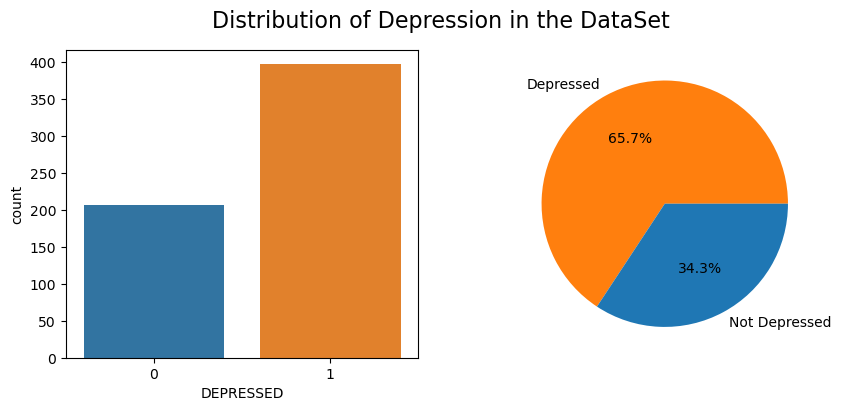

In [5]:
classCnt = df['DEPRESSED'].value_counts()
print(classCnt)
colors = [sns.color_palette()[0],sns.color_palette()[1]]
plt.figure(figsize = ((10,4)))

plt.subplot(1,2,1)
sns.countplot(df,x='DEPRESSED', palette=colors )

plt.subplot(1,2,2)
plt.pie(classCnt,labels = ['Depressed','Not Depressed'],autopct='%.1f%%' , colors=colors[::-1])
plt.suptitle('Distribution of Depression in the DataSet', fontsize=16)

plt.show()

As we can see the distribution does not reflect the reality at all.
In the dataset the depressed number is greater than the actual prevalence of depression.
The data is not balanced and we will take care of it later.

To gain a perspective on the data, let's examine the distribution within our dataset across several key parameters: gender, marital status, education, and profession.


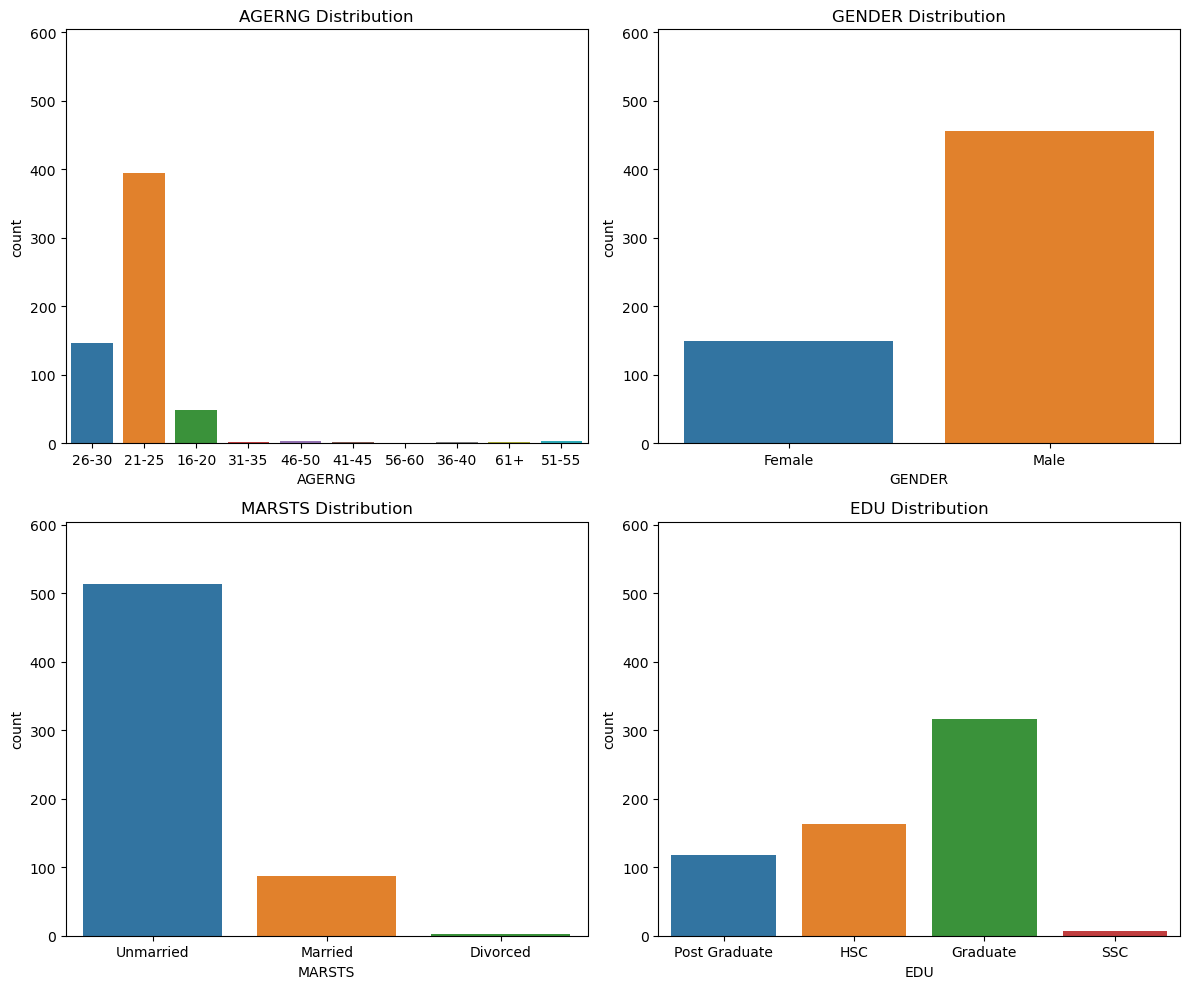

In [6]:
## # Assuming you have a DataFrame named 'df'
parameters = ['AGERNG','GENDER', 'MARSTS', 'EDU']

# Create a larger figure
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # Adjust the figure size as needed

# Loop through each parameter and create the count plot
for i, parameter in enumerate(parameters):
    row = i // 2
    col = i % 2

    sns.countplot(data=df, x=parameter, ax=axs[row, col])
    axs[row, col].set_title(f'{parameter} Distribution')
    axs[row,col].set_ylim(0, len(df))

# Adjust spacing and display plot

plt.tight_layout()
plt.show()

<b> Depressed according to category </b>

To gain a better understanding of the data, let's examine the distribution of participants who are depressed and those who are not depressed within the dataset based on different criteria. First, we will explore the distribution of depressed participants by gender.

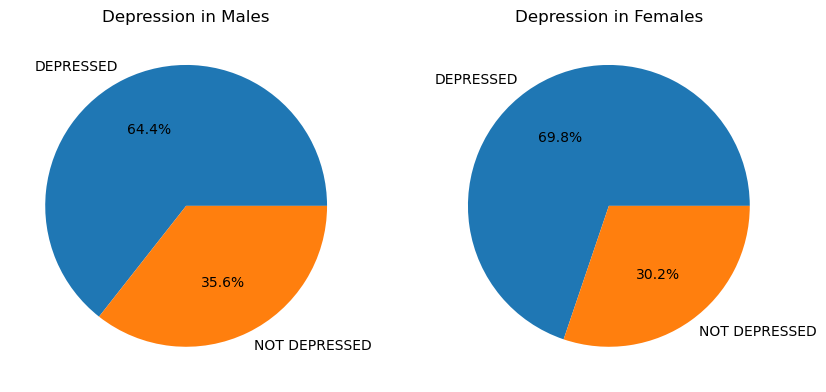

In [7]:
counts = df.groupby('GENDER')['DEPRESSED'].mean().reset_index()
counts['Percent_Depressed'] = counts['DEPRESSED'] * 100

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Create a pie chart for the 'Male' category
MalePercents = counts.loc[counts['GENDER'] == 'Male', 'Percent_Depressed'].iloc[0]
axes[0].pie([MalePercents, 100 - MalePercents], labels=['DEPRESSED', 'NOT DEPRESSED'], autopct='%1.1f%%')
axes[0].set_title('Depression in Males')

# Create a pie chart for the 'Female' category
FemalePercents = counts.loc[counts['GENDER'] == 'Female', 'Percent_Depressed'].iloc[0]
axes[1].pie([FemalePercents, 100 - FemalePercents], labels=['DEPRESSED', 'NOT DEPRESSED'], autopct='%1.1f%%')
axes[1].set_title('Depression in Females')
# Display the plot
plt.show()


As we can see Females are depressed more then a Males. Now we will see a bar plot according to profession, work pressure, education and average time in social networks in a day.

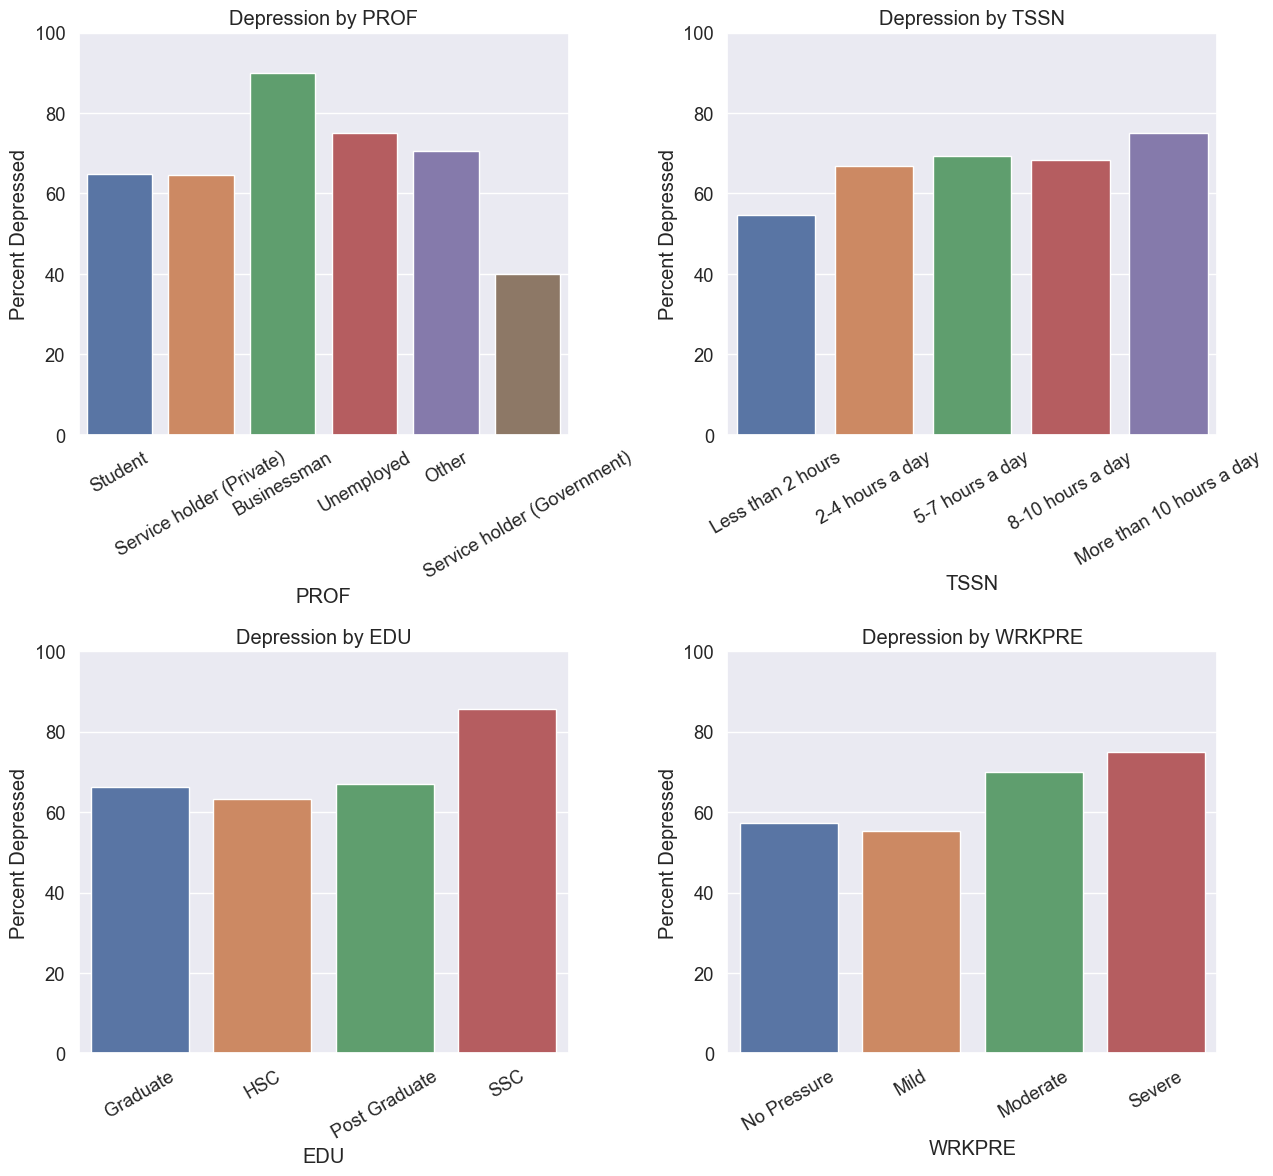

In [8]:
def plot_depression_percentages_yaxis(df, column_list, custom_order=None):

    sns.set(font_scale=1.2)

    # Create a subplot grid based on the number of columns
    num_columns = len(column_list)
    num_rows = num_columns // 2 + num_columns % 2  # Adjust for odd column counts
    fig, axes = plt.subplots(num_rows, 2, figsize=(13, 6 * num_rows))

    # Flatten the 2D axes array for easier indexing
    axes = axes.flatten()

    for i, column in enumerate(column_list):
        # Create a DataFrame with counts for each category in the column
        counts = df.groupby(column)['DEPRESSED'].mean().reset_index()
        counts['Percent_Depressed'] = counts['DEPRESSED'] * 100

        # Plot the countplot with percentage annotations
        sns.barplot(x=column, y='Percent_Depressed', data=counts, ax=axes[i], order=custom_order.get(column))
        axes[i].set_title(f'Depression by {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Percent Depressed')

    # Rotate x-axis labels
    for ax in axes:
        plt.sca(ax)
        plt.xticks(rotation=30)
        ax.set_ylim(0, 100)

    # Remove empty subplots if needed
    for i in range(num_columns, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()




custom_order_dict = {'PROF': ['Student','Service holder (Private)', 'Businessman', 'Unemployed', 'Other', 'Service holder (Government)'],
                     'TSSN': ['Less than 2 hours', '2-4 hours a day','5-7 hours a day', '8-10 hours a day', 'More than 10 hours a day'],
                     'EDU': None,
                     'WRKPRE': ['No Pressure', 'Mild', 'Moderate','Severe']}
plot_depression_percentages_yaxis(df, ['PROF', 'TSSN', 'EDU', 'WRKPRE'], custom_order=custom_order_dict)



An intriguing observation reveals that 80% of business professionals experience depression, a striking contrast to the 40% prevalence among government employees.<br>
Furthermore, a noticeable distinction emerges when comparing individuals who spend over 10 hours daily on social networks to those who allocate less than 2 hours. The former group exhibits a higher incidence of depression.<br>
Regarding education levels, it becomes apparent that participants with lower educational qualifications tend to report higher levels of depression.<br>
Lastly, as work pressure intensifies, so does the likelihood of experiencing depression.


We want to examine the percentages within categories related to mood, including satisfaction with their current position, satisfaction with their current living environment, financial stress, recent experiences of conflict, feelings of being abused, cheated, or suicidal, and more. All of these categories relate to mental state.

In [9]:
# The function get a criteria a return a dictionary that contains:
# The total participants, the number of Depressed Participants and the percent of depressed .participants in each category.

def getCatagorialData (criteria):
    Data = []
    for group , frame in df.groupby(criteria):
        count_depressed = np.sum(frame['DEPRESSED'])
        total_count = len(frame)
        percentDepressed = count_depressed / total_count * 100
        Data.append({'Criteria':criteria, 'Category': group, 'Total Participants': total_count,
                              'Number of Depressed Participants': count_depressed, 'Percent' :  percentDepressed} )
    return Data

In [10]:
# The function get a list of criterias and return a DataFrame that contains for each criteria the infromation
# that the function getCatagorialData give
def createCombinedData(criterias):
    combinedData = []  # list to store categorical data

    # Collect categorical data in the list
    for crit in criterias:
        for category in getCatagorialData(crit):
            combinedData.append(category)

    # Create the combined DataFrame using the collected data
    return pd.DataFrame(combinedData)


In [11]:
# Create a bar plot using seaborn
def CombinendDataPlot (combined_df):
    plt.figure(figsize=(15, 7))
    sns.barplot(x='Criteria', y='Percent', hue='Category', data=combined_df, capsize=0.8, dodge=True)

    # Use a custom color palette for distinct colors
    custom_palette = sns.color_palette("Set1", n_colors=len(combined_df['Category'].unique()))
    sns.set_palette(custom_palette)
    plt.title('Percent of Depressed Participants by Category')
    plt.legend(title="Category",bbox_to_anchor=(-0.15, 1), loc='upper left')
    plt.show()

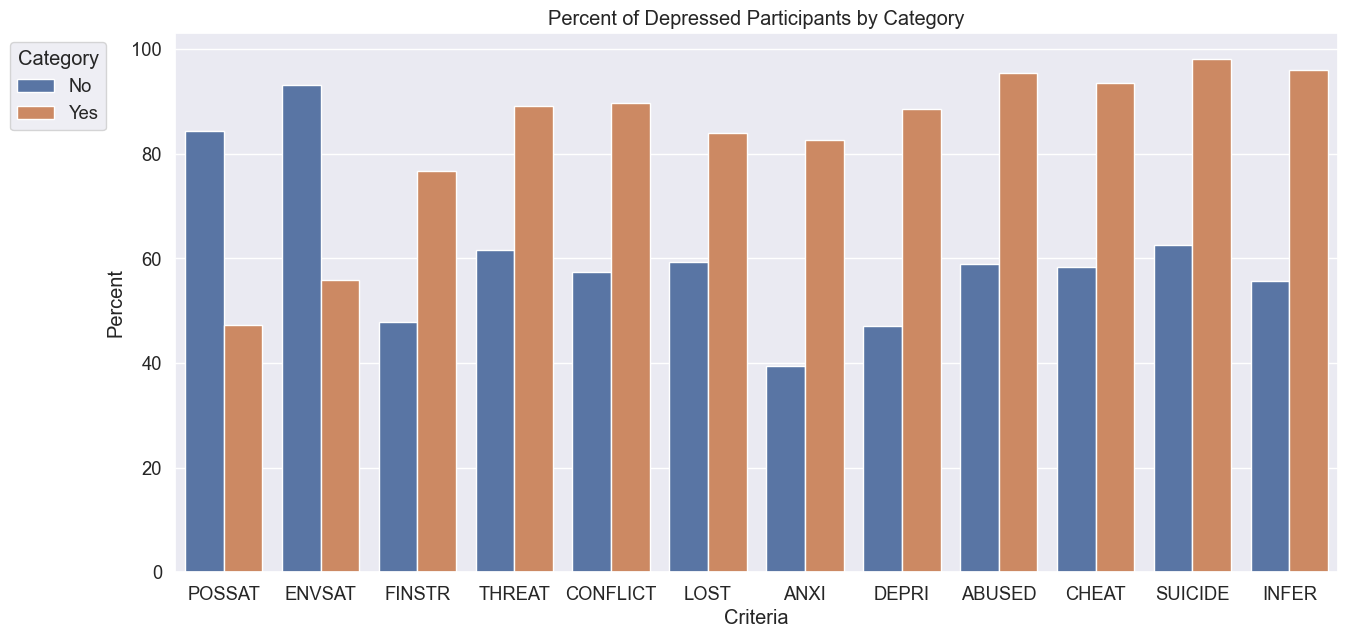

In [12]:
mental_features = ['POSSAT','ENVSAT','FINSTR','THREAT','CONFLICT','LOST','ANXI', 'DEPRI', 'ABUSED', 'CHEAT', 'SUICIDE', 'INFER']
CombinendDataPlot(createCombinedData(mental_features))

It's not surprising to observe that participants who answer negatively regarding their satisfaction tend to have a higher incidence of depression. <br>
Furthermore, it's evident that individuals experiencing any of these symptoms are at a greater risk of developing depression.


### A little bit of statistics
In the chart above, it's clear that the prevalence of depression is notably higher among individuals who also experience mental health issues.<br>
Our next step is to do statistical analysis to determine whether mental factors have a more significant influence on depression compared to socio-demographic features.

The mental health features are the same as we used in the chart above.<br>
These socio-demographic features are: <b> GENDER, EDU, PROF, MARSTS, RESDPL, LIVWTH, PHYEX, AVGSLP, and TSSN</b>. Notably, we've excluded age from this analysis because our earlier observations revealed that almost all our participates are in the same age ranges(21-30).

Our objective here is to unveil the hidden impact of these seemingly unrelated features on depression,  and to contrast it with the impact of features that appear to be more closely linked to depression.<br>
Through the lens of an <b>Ordinary Least Squares (OLS)</b> regression analysis, we seek to discern how these variables influence or predict the binary outcome of depression (our dependent variable).<br>
<b>OLS regression</b> allows us to estimate the relationships between our dependent variable, <b>'DEPRESSED'</b>, and one or more independent variables.

First we will start with the socio demographic features:

In [13]:
socio_demographic_features = ['GENDER','EDU','PROF','MARSTS','RESDPL','LIVWTH', 'AVGSLP']

socio_demographic_X = pd.get_dummies(df[socio_demographic_features], columns=socio_demographic_features)
y = df['DEPRESSED']

# Fit the regression model
regression_socio_demographic_model = sm.OLS(y, socio_demographic_X).fit()  # Ordinary Least Squares (OLS) regression
socio_demographic_summary = regression_socio_demographic_model.summary()
#shoe the summary results
socio_demographic_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              DEPRESSED   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.212
Date:                Mon, 01 Jan 2024   Prob (F-statistic):              0.241
Time:                        17:41:40   Log-Likelihood:                -395.23
No. Observations:                 604   AIC:                             830.5
Df Residuals:                     584   BIC:                             918.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
GENDER_Female                        0.2073      0.036      5.707      0.000       0.136       0.279
GENDER_Male                          0.1673      0.033      5.003      0.000       0.102       0.233
EDU_Graduate                         0.0440      0.048      0.917      0.360      -0.050       0.138
EDU_HSC                              0.0255      0.055      0.467      0.640      -0.082       0.133
EDU_Post Graduate                    0.0629      0.057      1.112      0.267      -0.048       0.174
EDU_SSC                              0.2421      0.142      1.705      0.089      -0.037       0.521
PROF_Businessman                     0.3154      0.134      2.349      0.019       0.052       0.579
PROF_Other                           0.0587      0.106      0.556      0.578      -0.149       0.266
PROF_Service holder (Government)    -0.2043      0.136     -1.507      0.132      -0.471       0.062
PROF_Service holder (Private)        0.0373      0.061      0.611      0.542      -0.083       0.157
PROF_Student                         0.0524      0.052      1.010      0.313      -0.050       0.154
PROF_Unemployed                      0.1150      0.076      1.513      0.131      -0.034       0.264
MARSTS_Divorced                      0.3801      0.200      1.896      0.058      -0.014       0.774
MARSTS_Married                      -0.0293      0.089     -0.329      0.742      -0.204       0.145
MARSTS_Unmarried                     0.0238      0.084      0.282      0.778      -0.142       0.190
RESDPL_City                          0.1542      0.031      5.047      0.000       0.094       0.214
RESDPL_Town                          0.1648      0.034      4.865      0.000       0.098       0.231
RESDPL_Village                       0.0557      0.038      1.458      0.145      -0.019       0.131
LIVWTH_With Family                   0.1696      0.035      4.792      0.000       0.100       0.239
LIVWTH_Without Family                0.2050      0.040      5.117      0.000       0.126       0.284
AVGSLP_5 hours                       0.0591      0.055      1.071      0.285      -0.049       0.167
AVGSLP_6 hours                       0.0389      0.040      0.985      0.325      -0.039       0.117
AVGSLP_7 hours                       0.0283      0.039      0.735      0.463      -0.047       0.104
AVGSLP_8 hours                       0.0494      0.042      1.170      0.242      -0.034       0.132
AVGSLP_Below 5 hours                 0.1935      0.059      3.270      0.001       0.077       0.310
AVGSLP_More than 8 hours             0.0053      0.064      0.083      0.934      -0.121       0.131
==============================================================================
Omnibus:                     5573.254   Durbin-Watson:                   2.

Let's explain what we see in the table above:

The summary statistics generated by the regression analysis provide valuable insights into the model's performance. Let's break down the main sections:

<b>Df Residuals (Degrees of Freedom of Residuals):</b> This represents the number of degrees of freedom associated with the residuals or errors in the model. It is a measure of the number of data points minus the number of variables being estimated.

<b>Df Model (Degrees of Freedom of the Model):</b> This indicates the number of degrees of freedom associated with the model itself. It's essentially the number of independent variables used in the model.

<b>Covariance Type:</b> This describes the type of covariance structure assumed for the model's coefficients.

<b>R-squared (R²):</b> R-squared is a crucial statistic that measures how well the independent variables (the features) explain the variance in the dependent variable (DEPRESSED). An R-squared value closer to 1 indicates that the independent variables do a good job explaining the variation in the dependent variable. <br>
In our case, the low R-squared value indicates that the independent variables included in the model do not account for a substantial portion of the variation in the "DEPRESSED" variable.

<b>Adj. R-squared (Adjusted R²):</b> This is a variation of R-squared that adjusts for the number of independent variables in the model. It is a useful indicator of model fit. Again, the Adjusted R² is low, suggesting that the model is not providing a good fit.

<b>F-statistic:</b> The F-statistic tests the overall significance of the model. It assesses whether the independent variables, as a whole, have a significant impact on explaining the variance in the dependent variable.

<b>Prob (F-statistic):</b> This is the probability associated with the F-statistic. It tells you the likelihood that the observed F-statistic occurred by chance.
<b>Log-Likelihood:</b> This represents the log-likelihood of the model, which is used in estimating the model's quality and likelihood.

<b>AIC (Akaike Information Criterion):</b> The AIC is a measure of the model's quality. Lower AIC values suggest better-fitting models. As we can see, our AIC is very high, which means the model quality is not high.<br>
<b>BIC (Bayesian Information Criterion):</b> Similar to AIC, the BIC is another measure of model quality. Like AIC, lower BIC values are indicative of better models.

As we explained the overall model with these features is not very good.<br>
Now we will explain the result for each feature.

The <b>coef</b> column displays the estimated coefficients for the independent variables. The coefficients represent the impact of each independent variable (features) on the dependent variable (DEPRESSED). Each coefficient value indicates how much the <b>"DEPRESSED"</b> variable is expected to change with a one-unit change in the corresponding independent variable.<br>
For example, the feature <b>AVGSLP_Below 5 hours</b> has the highest coefficient compared to other sleep duration features.
This means that among the different sleep duration features, the one labeled <b>AVGSLP_Below 5 hours</b> has the most significant impact on the outcome, <b>"DEPRESSED"</b>.

<b>std err</b> shows the standard error of the coefficients.<br>
<b>t</b> is the <b>t-statistic</b>, which tests the significance of each coefficient.<br>
<b>P>|t|</b> represents the p-value for each coefficient. Low p-values indicate that the coefficient is statistically significant.
    
Let's plot a forest plot of the results:

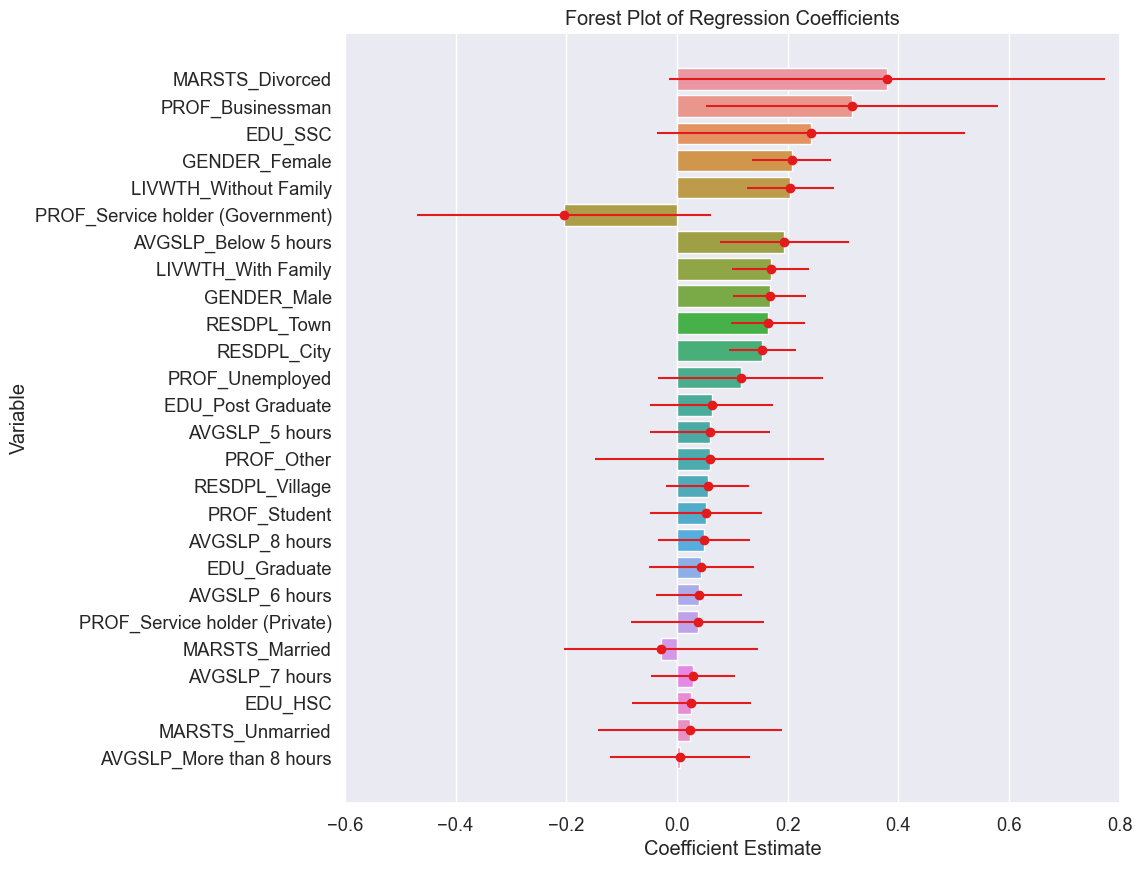

In [14]:
def forestPlotRegression(model):
    # Extract relevant data from the regression summary
    coefs = model.params
    cis = model.conf_int()
    # Convert the coefficients and confidence intervals to numeric values
    coefs = pd.concat([coefs, cis], axis=1)
    coefs.columns = ['coef', 'CI_lower', 'CI_upper']

    # Sort the coefficients in descending order for better visualization
    sorted_idx = np.argsort(-np.abs(coefs['coef']))
    coefs = coefs.iloc[sorted_idx]

    # Create a forest plot
    plt.figure(figsize=(10, 10))
    sns.barplot(x='coef', y=coefs.index, data=coefs, errorbar=None)
    plt.errorbar(x=coefs['coef'], y=coefs.index, xerr=[coefs['coef'] - coefs['CI_lower'], coefs['CI_upper'] - coefs['coef']], fmt='o')
    plt.xlabel('Coefficient Estimate')
    plt.xlim(-0.6,0.8)
    plt.ylabel('Variable')
    plt.title('Forest Plot of Regression Coefficients')
    plt.show()

forestPlotRegression(regression_socio_demographic_model)

The dot is the coef values. The horizontal line represents the confidence interval (CI) for the coefficient estimate.
The error bars show the range within which the true coefficient value is likely to fall with a certain level of confidence.
Short lines mean that our model has more confidence regarding the coef value.

Let's now turn our attention to the mental health features. We will follow a similar approach to analyze their impact on depression.

In [15]:
mental_X = pd.get_dummies(df[mental_features], columns=mental_features)
# Fit the regression model
regression_mental_model = sm.OLS(y, mental_X).fit()  # Ordinary Least Squares (OLS) regression
mental_summary = regression_mental_model.summary()
mental_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              DEPRESSED   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     50.51
Date:                Mon, 01 Jan 2024   Prob (F-statistic):           1.72e-82
Time:                        17:41:41   Log-Likelihood:                -193.73
No. Observations:                 604   AIC:                             413.5
Df Residuals:                     591   BIC:                             470.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
POSSAT_No        0.1763      0.015     11.798      0.000       0.147       0.206
POSSAT_Yes      -0.0372      0.015     -2.429      0.015      -0.067      -0.007
ENVSAT_No        0.1308      0.018      7.435      0.000       0.096       0.165
ENVSAT_Yes       0.0083      0.017      0.498      0.619      -0.025       0.041
FINSTR_No        0.0188      0.016      1.203      0.229      -0.012       0.050
FINSTR_Yes       0.1203      0.015      8.276      0.000       0.092       0.149
THREAT_No        0.0167      0.020      0.846      0.398      -0.022       0.055
THREAT_Yes       0.1224      0.021      5.826      0.000       0.081       0.164
CONFLICT_No      0.0172      0.017      1.021      0.308      -0.016       0.050
CONFLICT_Yes     0.1220      0.017      7.059      0.000       0.088       0.156
LOST_No         -0.0171      0.016     -1.052      0.293      -0.049       0.015
LOST_Yes         0.1562      0.017      9.268      0.000       0.123       0.189
ANXI_No         -0.0537      0.016     -3.383      0.001      -0.085      -0.023
ANXI_Yes         0.1928      0.015     12.813      0.000       0.163       0.222
DEPRI_No        -0.0137      0.016     -0.856      0.393      -0.045       0.018
DEPRI_Yes        0.1528      0.015      9.974      0.000       0.123       0.183
ABUSED_No        0.0347      0.019      1.844      0.066      -0.002       0.072
ABUSED_Yes       0.1044      0.020      5.217      0.000       0.065       0.144
CHEAT_No         0.0417      0.019      2.198      0.028       0.004       0.079
CHEAT_Yes        0.0974      0.019      5.042      0.000       0.059       0.135
SUICIDE_No       0.0652      0.025      2.564      0.011       0.015       0.115
SUICIDE_Yes      0.0739      0.028      2.666      0.008       0.019       0.128
INFER_No         0.0030      0.018      0.165      0.869      -0.032       0.038
INFER_Yes        0.1362      0.018      7.459      0.000       0.100       0.172
==============================================================================
Omnibus:                       39.052   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.210
Skew:                           0.098   Prob(JB):                     0.000498
Kurtosis:                       2.248   Cond. No.                     4.39e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.38e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

If we examine the <b>R-squared</b> value, it becomes evident that this model is significantly improved. <br>

Delving into the forest plot displayed below, you'll notice that the horizontal lines associated with the variables of interest are notably shorter compared to the socio-demographic ones. <br>
This observation implies that the model is considerably better suited to explain the variations in
these features, indicating that the model has improved.

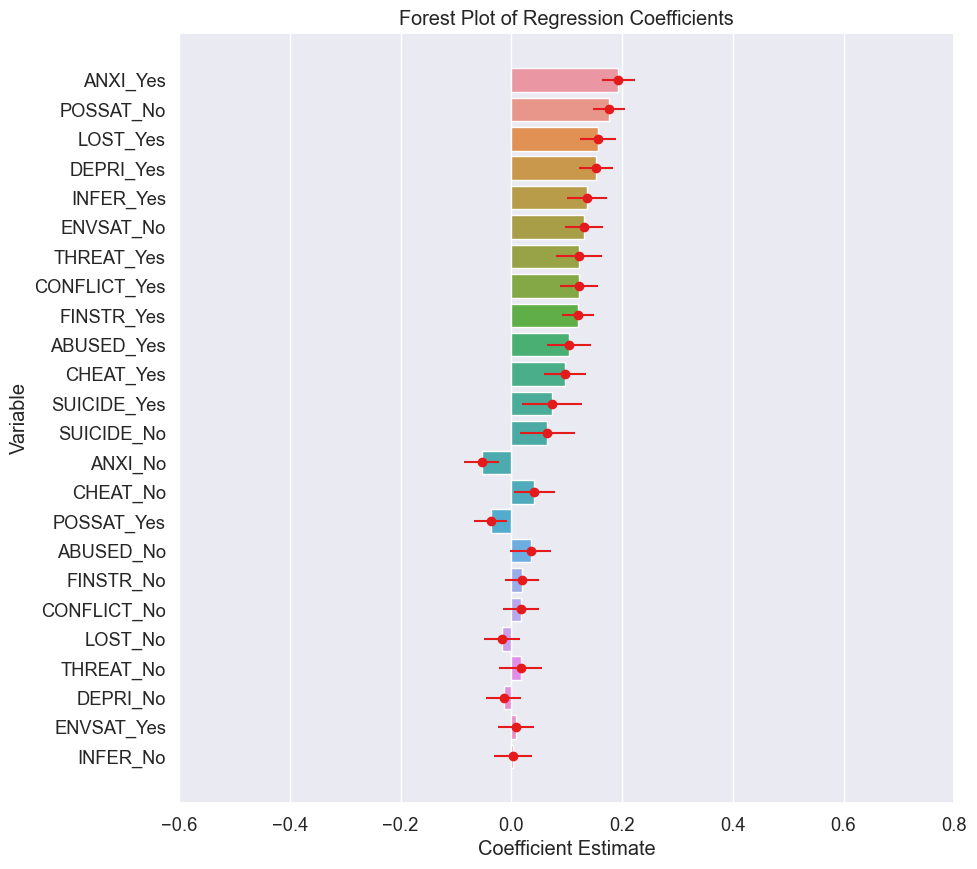

In [16]:
forestPlotRegression(regression_mental_model)

#### Conclusion
Our analysis so far of mental features and socio-demographic features reveals that the impact of mental features on depression appears to be more substantial compared to socio-demographic factors. In our further analysis, we will delve into feature importance based on the models we construct, which will give us more of a clear view about the impact of features.

### Encoding the data
Before we continue we need to encode the data.

Encoding the data is very important because almost all the algorithms we will work with in the library sklearn are familiar with only numerical variables. We will encode with label encoding, and we will save the label encoding for each category in case we will want to decode our data.

In [17]:
#Encode categorical features using label encoding

label_encoders = {} # save the label encondeing
encoded_df = df.copy()
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    encoded_df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# A sample of the encoded data frame
encoded_df.head()


AGERNG  GENDER  EDU  PROF  MARSTS  RESDPL  LIVWTH  ENVSAT  POSSAT  FINSTR  \
0       2       0    2     5       2       1       0       1       1       0   
1       2       1    2     3       2       0       0       1       0       1   
2       1       1    1     4       2       0       0       1       1       0   
3       0       1    1     4       2       0       0       0       1       0   
4       1       1    0     4       2       1       0       0       1       1   

   ...  ANXI  DEPRI  ABUSED  CHEAT  THREAT  SUICIDE  INFER  CONFLICT  LOST  \
0  ...     1      0       0      0       0        0      0         1     0   
1  ...     1      1       1      0       0        0      1         0     0   
2  ...     1      1       0      0       0        0      0         0     0   
3  ...     1      1       0      1       0        0      0         0     0   
4  ...     1      1       0      0       0        0      1         1     0   

   DEPRESSED  
0          0  
1          1  
2          0  
3          1  
4          1  

[5 rows x 31 columns]

We can see the data is encoded now, so now we are dealing with numbers and not with labels.

### Split the Dataset
In this section, we will divide the dataset into two distinct sets: a training set, which will encompass 80% of the data, and a test set, containing the remaining 20%. Our data manipulations and model training will be conducted exclusively on the training set.

Subsequently, we will assess the performance and results of our model on the test set.

In [18]:
features = encoded_df.drop(columns=['DEPRESSED'], axis = 1)
target = encoded_df['DEPRESSED']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))


Number of training dataset:  483
Number of test dataset:  121
Total number of dataset:  604


## Balancing the dataset

As we mentioned earlier, our dataset is not balanced. The number of depressed participants is almost twice then the number of participants who do not suffer from depression.<br>
To enhance the predictive accuracy of the minority class, the dataset must be balanced.<br>
Imbalanced datasets can lead to biased model predictions, where the model performs well on the majority class but poorly on the minority class.

<b>Synthetic Minority Oversampling Technique (SMOTE)</b> is used to tackle the class imbalance problem. <br>
<b>SMOTE</b> works in the following way:

<b>Selecting a Data Point:</b> SMOTE begins by randomly selecting a data point from the minority class.<br>
<b>Identifying Neighbors:</b> SMOTE identifies the k-nearest neighbors of the selected data point. The value of k is a user-defined parameter.<br>
<b>Generating Synthetic Examples:</b> For each of the k-nearest neighbors, SMOTE creates synthetic examples by interpolating between the selected data point and its neighbors.
This is done by selecting a random neighbor and calculating the difference between the feature values of the selected data point and the neighbor.
The difference is then multiplied by a random value between 0 and 1, and the result is added to the selected data point to create the synthetic example.

If A is the  feature vector of the minority class sample and B is it's neighbor, the new feature vector will be:

$ NEW = A + (A-B) \times R $

where R is a random number between 0 to 1.

In our case the minority is the not depressed class.<br>
We are applying the process only on the training set to avoid information leakage.

In [19]:
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


Let's see the change:

The size of the original training set: (483, 30) 
The size of the balanced training set: (640, 30) 


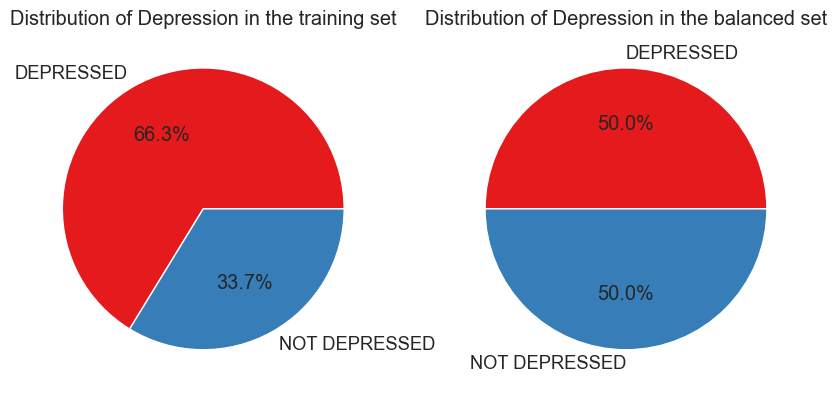

In [20]:
print(f"The size of the original training set: {X_train.shape} ")
print(f"The size of the balanced training set: {X_resampled.shape} ")

train_depressed_percent = np.sum(y_train) / len(y_train) * 100
balance_depressed_percent = np.sum(y_resampled) / len(y_resampled) * 100

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Create a pie chart for the 'DEPRESSED' category
axes[0].pie([train_depressed_percent, 100 - train_depressed_percent], labels=['DEPRESSED', 'NOT DEPRESSED'], autopct='%1.1f%%')
axes[0].set_title('Distribution of Depression in the training set')

# Create a pie chart for the 'DEPRESSED' category in the balanced set
axes[1].pie([balance_depressed_percent, 100 - balance_depressed_percent], labels=['DEPRESSED', 'NOT DEPRESSED'], autopct='%1.1f%%')
axes[1].set_title('Distribution of Depression in the balanced set')

plt.show()


We can see that now our Depressed class  is balanced.


## Feature Selection

Our primary objective is to construct an accurate predictive model for depression using socio-demographic and psychosocial data while identifying the most influential features related to depression.<br>
In the realm of machine learning model development, the selection of input features holds paramount importance. Notably, these features must not only be relevant but also carry substantial significance for precise predictions..<br>
It's important to recognize that not all features are of equal importance in a prediction task: in some instances, certain features can introduce noise, potentially undermining the model's effectiveness.

To tackle this challenge, we employ sophisticated Feature Selection techniques. These techniques enable us to meticulously evaluate the dataset, pinpointing the most relevant features that contribute to our model.
With Feature Selection we reduce overfitting: Less redundant data means less opportunity to make decisions based on noise.

We will use serval feature selection techniques like <b> Select K Best, Mrmr, Boruta </b>.
In each one we will explain about the technique, we will see the importance of the features according to each technique. Finally, we will compare each algorithm with each selection technique so we can see which algorithm works the best with which selection technique.


First we will create a class, that represents a Feature Selection instance.<br>
It will contain attributes like the new training data and testing data set with the selected features, and also the ML models that will be trained on the new data set.


In [21]:
class FeatureSelection():
    def __init__ (self,name, newX_train, newX_test):
        self.name = name
        self.newX_train = newX_train
        self.newX_test = newX_test

        # Define the classifers
        self.LR = None
        self.DT = None
        self.RF = None
        self.AdaBoost = None
        self.KNN = None
        self.SVM = None
        self.Voting= None

    def getSelectedFeatuersNames(self):
        return self.newX_train.columns

    def getSelectedFeatureIindices(self):
        return  [X_resampled.columns.get_loc(feature) for feature in self.getSelectedFeatuersNames()]

    def getalgorithms(self):
        return [self.LR,self.DT,self.RF,self.AdaBoost,self.KNN,self.SVM, self.Voting]

    def correlationSelectedFeatures(self):
        selected_features_with_target = pd.concat([self.newX_train, y_resampled], axis=1)

        # Calculate the correlation matrix
        correlation_matrix = selected_features_with_target.corr()

        # Create a heatmap
        plt.figure(figsize=(15, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title(f'Correlation Heatmap between Selected Features with {self.name} and Target')
        plt.show()

First let's create an instance of the class, without feature selection

In [22]:
withoutFS = FeatureSelection("Without FS", X_resampled, X_test)


### Select K Best

<b>Select K Best</b> method selects the features according to the k highest score. By changing the 'score_func' parameter we can apply the function that determined the score.

We'll be employing the <b>chi-square test</b>, a statistical method that assesses the presence of a significant association between two categorical variables. Specifically, we'll employ this test to gauge the level of independence between our variables and the "Depressed" variable.



In [23]:

kBestSelector = SelectKBest(score_func=chi2, k= 15)
kBestSelected_features = kBestSelector.fit_transform(X_resampled, y_resampled)
kBestSelectedIindices = kBestSelector.get_support(indices=True)


# remain only the K best Features
X_kBestTrain =   X_resampled.iloc[:, kBestSelectedIindices]
X_kBestTest =   X_test.iloc[:, kBestSelectedIindices]
selectKBest = FeatureSelection("Select K Best",X_kBestTrain, X_kBestTest )


kBest_selected_feature_names = kBestSelector.get_feature_names_out()

KBestScores =  kBestSelector.scores_[kBestSelectedIindices] # get the score of the features in the chi-square test
print(selectKBest.getSelectedFeatuersNames())

Index(['ENVSAT', 'POSSAT', 'FINSTR', 'DEBT', 'EATDIS', 'INSOM', 'ANXI',
       'DEPRI', 'ABUSED', 'CHEAT', 'THREAT', 'SUICIDE', 'INFER', 'CONFLICT',
       'LOST'],
      dtype='object')


Let's see the score of the k best features.

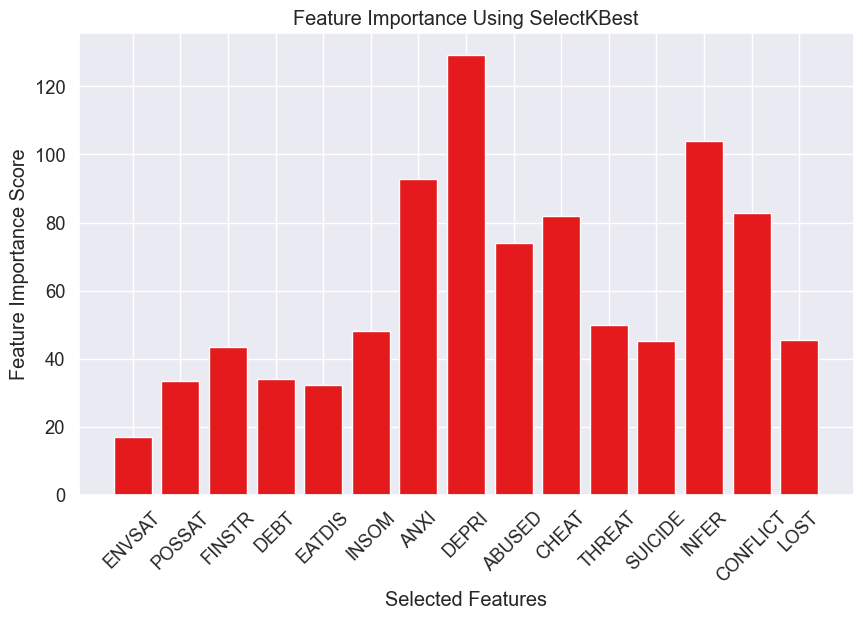

In [24]:
def showScore(selected_feature_names, scores):
    plt.figure(figsize=(10, 6))
    plt.bar(selected_feature_names, scores)
    plt.xlabel('Selected Features')
    plt.ylabel('Feature Importance Score')
    plt.title('Feature Importance Using SelectKBest')
    plt.xticks(rotation=45)
    plt.show()

showScore(selectKBest.getSelectedFeatuersNames(),KBestScores)

Clearly, the impactful features are those related to mood, and this observation comes as no surprise.<br>
We want to see the correlation between the selected features and the target.


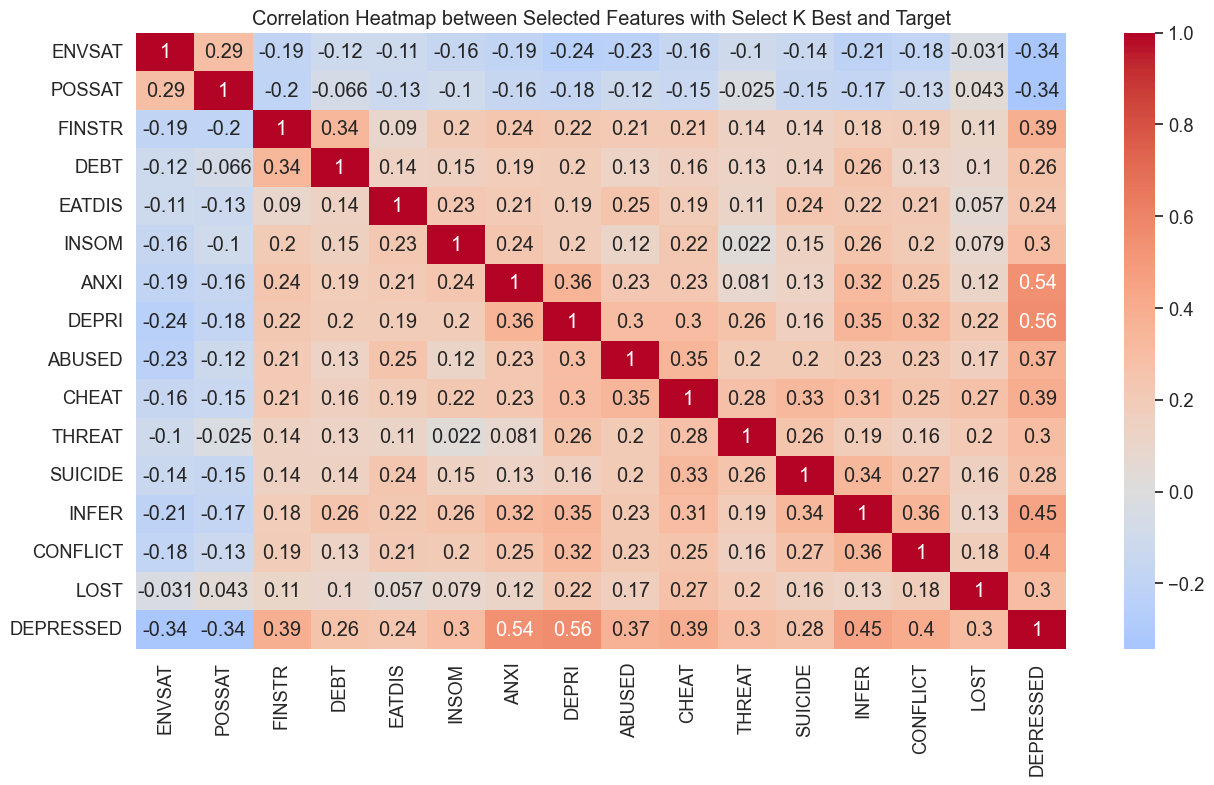

In [25]:
selectKBest.correlationSelectedFeatures()


The analysis reveals strong correlations between the target variable and other features.
 It is interesting to see that DEPRI exhibits the highest correlation with DEPRESSED and attains the highest chi-square test scores.

It's worth noting that the low correlation of ENVSAT and POSSAT with the remaining variables indicates that when ENVSAT and POSSAT are 0 (NO), the others tend to be 1 (YES) and the opposite.


### mRMR
The <b>mRMR (Minimum Redundancy and Maximum Relevance)</b> algorithm finds an optimal set of features that is mutually and maximally dissimilar and can represent the target variable effectively. The algorithm minimizes the redundancy of a feature set and maximizes the relevance of a feature set to the target variable.
The feature having the maximum relevance to the target variable and minimum redundancy within the features gets the highest rank in mRMR. Both redundancy and relevance are measured using Mutual Information (MI).
The algorithm select features that collectively maximize the relevance to the target variable while minimizing redundancy among the selected features.

We will use the mRMR function from the pymrmr library. This function get a data frame where the first column is the target and the other columns are the other features.

In [26]:
mRMR_data_combined = pd.concat([y_resampled,X_resampled ], axis=1)

# Number of features to select
num_features_to_select = 13


# Use pymrmr to perform mRMR feature selection
mRMRselected_features = pymrmr.mRMR(mRMR_data_combined, 'MID', num_features_to_select)

# Extract the selected feature indices
mRMRselected_feature_indices = [X_resampled.columns.get_loc(feature) for feature in mRMRselected_features]

# Create an instance with selected features
X_mRMRTrain =  X_resampled.iloc[:, mRMRselected_feature_indices]
X_mRMRTest = X_test.iloc[:, mRMRselected_feature_indices]
mRMR = FeatureSelection("mRMR",X_mRMRTrain,X_mRMRTest)



Let's see which features are selected, and the correlation between them:

Index(['DEPRI', 'ANXI', 'INFER', 'FINSTR', 'CHEAT', 'CONFLICT', 'ABUSED',
       'POSSAT', 'ENVSAT', 'THREAT', 'LOST', 'INSOM', 'SUICIDE'],
      dtype='object')


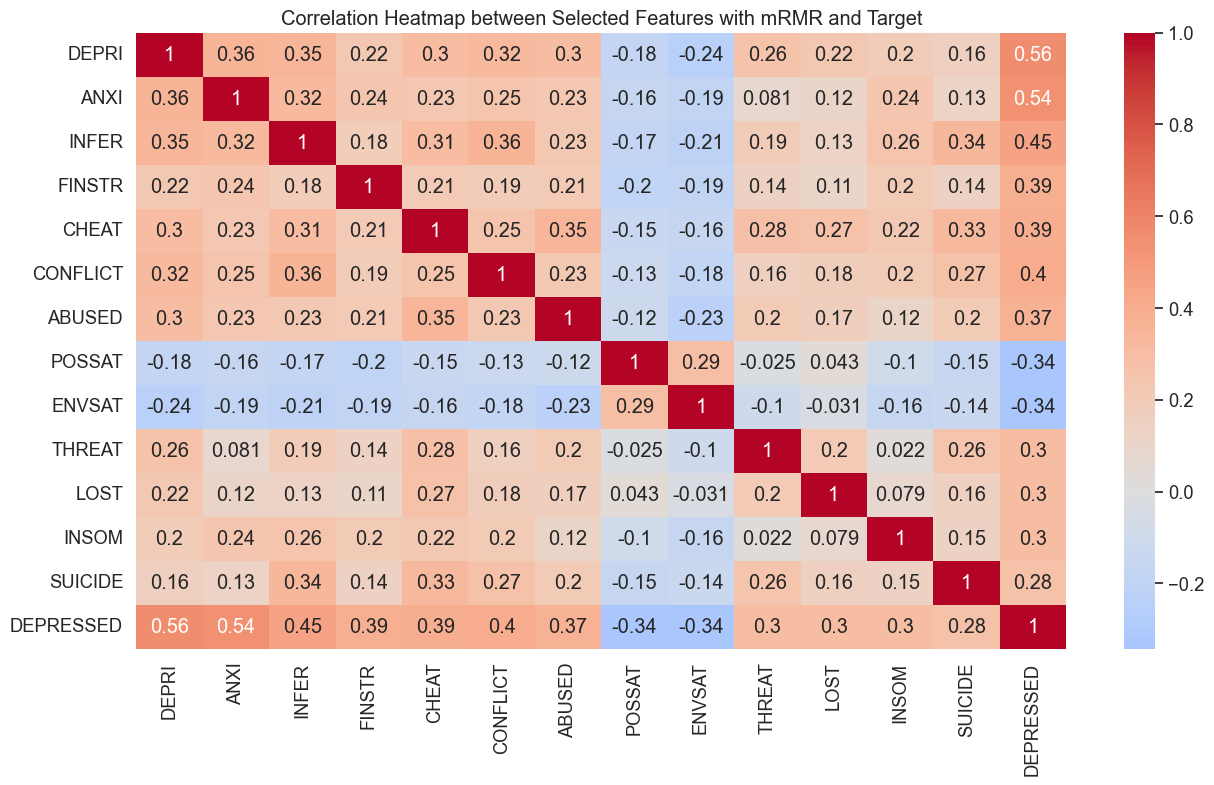

In [27]:
print(mRMR.getSelectedFeatuersNames() )
mRMR.correlationSelectedFeatures()

### Boruta

This method aims to select important features by iteratively removing the irrelevant attributes.
The steps of Boruta algorithm are given below:
* <b>Step I</b>: The dataset is extended by creating duplicates of all the features.
* <b>Step II</b>: Shadow features are created by shuffling the values of the duplicated features. Shuffling is performed for removing their correlations with the target variable.
* <b>Step III</b>: A random forest algorithm is applied to the extended dataset, and Z-scores are computed.
* <b>Step IV</b>: The Maximum Z-score among the Shadow Attributes (MZSA) is then detected.
* <b>Step V</b>: If a feature's importance is remarkably less than MZSA, then it is permanently removed from the dataset. On the other hand, if a feature's importance is remarkably greater than MZSA, then it is kept in the dataset.
* <b>Step VI</b>: Discard the shadow features from the dataset.
* <b> Step VII </b>: Repeat the steps until there is no unimportant feature in the dataset or for a predefined number of iterations.

In [28]:

rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# Initialize the Boruta feature selector
boruta_selector = BorutaPy(rf, n_estimators= 11, verbose=0, random_state=1)

# Fit the Boruta selector on your data
boruta_selector.fit(np.array(X_resampled), np.array(y_resampled))


BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=11, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x1E50526F340),
         n_estimators=11, random_state=RandomState(MT19937) at 0x1E50526F340)

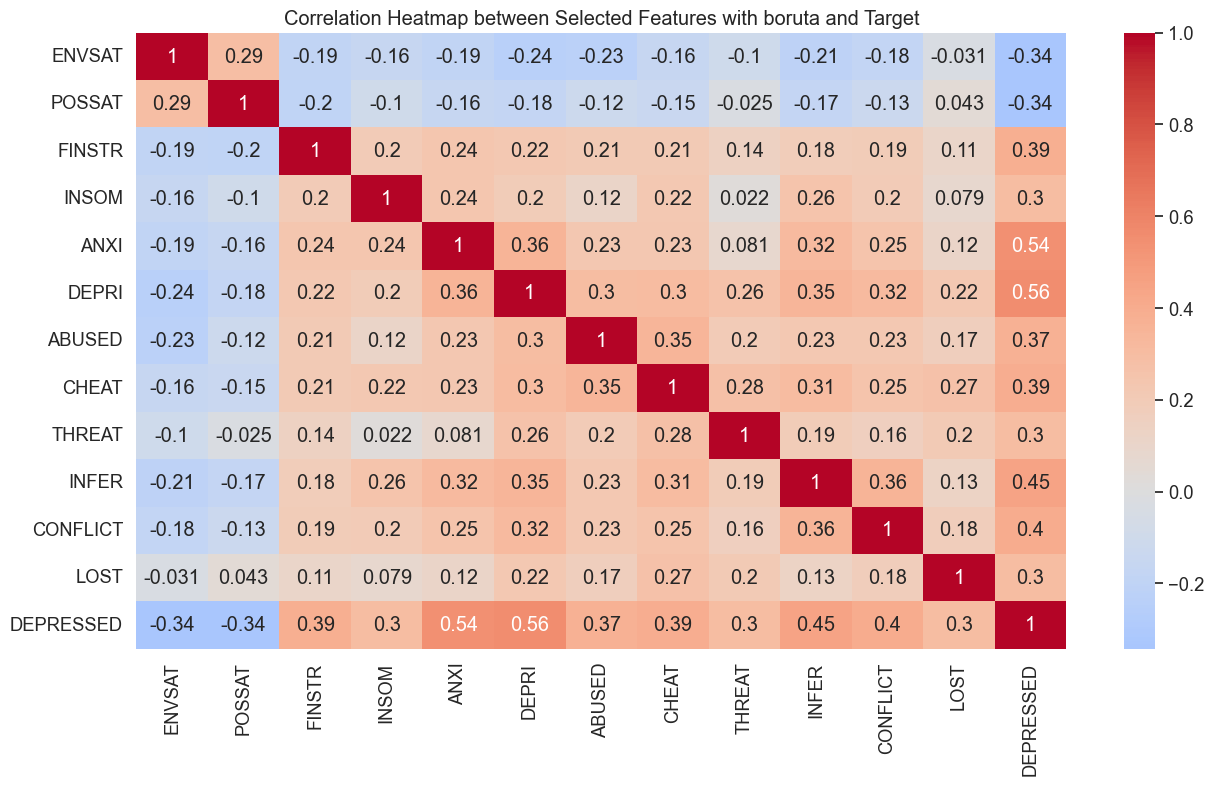

In [29]:
borutaIindices = boruta_selector.support_

X_borutaTrain =  X_resampled.iloc[:, borutaIindices]
X_borutaTest =  X_test.iloc[:, borutaIindices]

boruta = FeatureSelection("boruta", X_borutaTrain, X_borutaTest)
borutaScores =  boruta_selector.ranking_
boruta.correlationSelectedFeatures()


As we've discussed, the Boruta algorithm leverages the Random Forest method to determine the importance of features. Now, let's put this into action and visualize these feature importances.

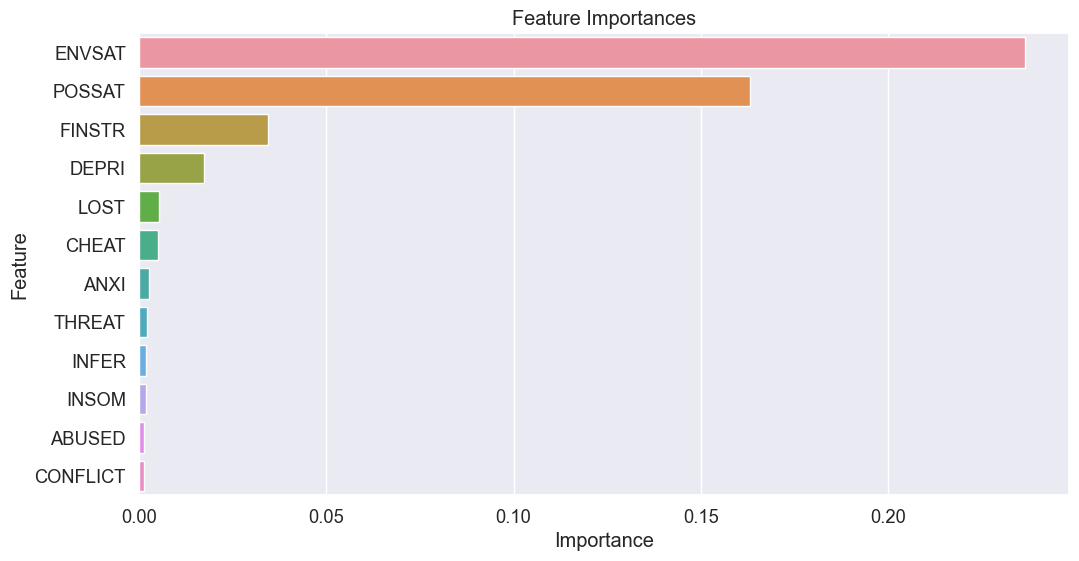

In [30]:
# Get the indices of the selected features
selected_feature_indices = np.where(boruta_selector.support_)

# Use the indices to filter feature importances
selected_feature_importances = boruta_selector.estimator.feature_importances_[selected_feature_indices]

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': boruta.getSelectedFeatuersNames(), 'Importance': selected_feature_importances})

# Sort the DataFrame by importance (descending order) for plotting
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()


It's seems that the financial parameters are have the most impact according to the boruta algorithm.

## Building a model
Once we've identified the most impactful features, the next step involves constructing models to address the problem. <br>
We need to keep our two primary goals in mind:<br>
1. Build a classifier capable of predicting whether someone is suffering from depression.
2. Find the most influential factors contributing to depression.

In this section we only dealing with building the best model. After we will finish with this task we will then concentrate on finding the influential factors contributing to depression.

We will create models such as: <b> Logistic Regression, Decision Trees, Random Forest, AdaBoosting, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), and Voting </b>.We will conduct a thorough exploration for optimal hyperparameters for each feature selection method through the implementation of k-fold cross-validation.

We will employ cross-validation to identify the optimal model. Subsequently, we will apply these models to the test dataset using the best hyperparameters.<br>
We also will compare the results from the test dataset among the various feature selection techniques.

Our assessment of the models will delve into various evaluation metrics to provide a holistic view of their performance:<br>
We will base our evaluation on four key concepts:<br>
<b>TP  </b>- true positive.  <b>FP </b> - false positive.  <b>TN </b> - true negative. <b> FN  </b>- false negative.

With these concepts, we define the following assessments:

* <b> Accuracy: </b> This metric measures the overall correctness of the model's predictions. It is calculated as $ (TP+TN) \div  (TP+TN+FP+FN) $
* <b> Precision: </b> Precision reflects the model's ability to make accurate positive predictions. It is calculated as $ TP \div  (TP+NP) $
* <b> Recall: </b> Recall, also known as sensitivity, gauges the model's capability to identify true positives. It is calculated as $ TP\div (TP+FN) $
* <b> F1-Score: </b> The F1-score strikes a balance between precision and recall, providing a single metric to assess a model's performance. It is calculated as$ (2\times Precision \times Recall) / (Precision \times Recall) $ . get high values if both Recall and Precision has high values.

<b> Confusion Matrix: </b> We'll utilize the confusion matrix to visualize true positives, true negatives, false positives, and false negatives.

By leveraging these evaluation metrics, we aim to gain deep insights into the strengths and weaknesses of each model, elucidating their potential applicability to real-world scenarios.

After each algorithm  we will compare all the metric results of all feature selections.
We also will compare the ROC and the AUC of the feature selections in each algorithm.
<b> The ROC curve </b> is a graphical representation of a classification model's performance. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings.
The ROC curve helps visualize the trade-off between the true positive rate and false positive rate at different classification thresholds.

<b> AUC (Area Under the ROC Curve):  AUC </b>quantifies the overall performance of a binary classification model.
It measures the area under the ROC curve. A perfect classifier would have an AUC of 1.0, indicating it can perfectly distinguish between the positive and negative classes.
Generally, a higher AUC indicates better model performance.

Before proceeding, we will create a base model class.


In [31]:
class BaseModel:
    def __init__(self, classifier , name):
        self.model = classifier   # Initialize the model attribute, which will hold the trained model
        self.name = name
        self.roc_auc_value = 0
        self.roc_curve = []

    # The function train the model and return the time of training the model if Time is True.
    def train(self, X_train, y_train, Time = False):
        if Time:
            start_time = time.time()  # Record the start time
        self.model.fit(X_train, y_train)
        if Time:
            end_time = time.time()    # Record the end time
            training_time = end_time - start_time  # Calculate the training time
            return training_time
    def test(self, X_test, test = y_test):
        y_pred = self.model.predict(X_test)
        return {metric: score(test, y_pred) for metric, score in [('accuracy', accuracy_score),
                                    ('precision', precision_score), ('recall', recall_score), ('f1_score', f1_score)]}

    def evaluate_with_cross_validation(self, X, y, scoring='accuracy', cv=5):
        """
        Evaluate the model using k-fold cross-validation.

        Parameters:
        - X: Input features.
        - y: Target labels.
        - scoring: The scoring metric to use (e.g., 'accuracy', 'precision', 'recall', 'f1').
        - cv: Number of cross-validation folds.

        Returns:
        - scores: List of cross-validation scores.
        """
        scores = cross_val_score(self.model, X, y, cv=cv, scoring=scoring)
        return scores

    def tune_hyperparameters(self, hyperparameter_grid, X,y, scoring = "accuracy", cv=5,verbose = 1):
        grid_search = GridSearchCV(estimator=self.model, param_grid=hyperparameter_grid,
                                   return_train_score=True, cv=cv, scoring=scoring ,verbose  = verbose)
        grid_search.fit(X, y)
        self.model = grid_search.best_estimator_
        return grid_search.cv_results_['mean_test_score'] # return the mean test of the grid search


Let's write functions that will compare the mertic results between the feature selection in specific model:

In [32]:
'''
This function gets FeatureSelections and models. For each model it calculate metric results for each feature selection
with it's test set.
It plot a bar plot with the accuracy, precision, recall and f1_score.
'''

def compareAllMetricsResults(FeatureSelections, Models):
    data = []
    metrics_to_compare = ['accuracy', 'f1_score', 'precision', 'recall']

    for feature_selection, model in zip(FeatureSelections, Models):
        metrics_dict = model.test(feature_selection.newX_test, y_test)
        method_data = {'Method': feature_selection.name, 'Model': model.name}
        for metric in metrics_to_compare:
            metric_value = metrics_dict.get(metric, 0.0)  # Replace 0.0 with a default value if needed
            method_data[metric] = metric_value
        data.append(method_data)


    # Melt the DataFrame for easy plotting
    melted_df = pd.melt(pd.DataFrame(data), id_vars=['Method', 'Model'], value_vars=metrics_to_compare,
                         var_name='Metric', value_name='Value')

    # Create a bar plot using seaborn
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Metric', y='Value', hue='Method', data=melted_df, capsize=0.8, dodge=True, palette='Set1')

    # Customize the plot as needed
    plt.title(f'Comparison of {Models[0].name} Models')
    plt.xlabel('Metric')
    plt.ylabel('Metric Value')
    plt.ylim(0.7, 1)  # Customize the y-axis limits as needed
    plt.legend(title="Feature Selection Method", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()



In [33]:

'''
This function get FeatureSelections and models for each model it plots the ROC and calculate the AUC
for each feature selection with it's test set.
The function also get a title to name the plot and print the AUC of each featureselection with it model.
'''

def showROCAUC(FeatureSelections,Models ,title):
    # Create empty lists to store ROC curve data and AUC values
    roc_curves = []
    auc_values = []

    for model, feature_selection in zip(Models,FeatureSelections):
        y_scores = model.predict_proba(feature_selection.newX_test)[:, 1]  # Get predicted probabilities for the positive class
        fpr, tpr, _ = roc_curve(y_test, y_scores)  # Calculate ROC curve
        roc_auc = auc(fpr, tpr)  # Calculate AUC
        model.roc_auc_value = roc_auc
        model.roc_curve = (fpr, tpr, roc_auc)

        roc_curves.append((fpr, tpr, roc_auc))
        auc_values.append(roc_auc)
    plt.figure(figsize=(10, 6))
    colors = ['purple', 'green', 'red', 'blue']

    # Plot ROC curves for each feature selection method
    for i, (fpr, tpr, roc_auc) in enumerate(roc_curves):
        plt.plot(fpr, tpr, label=f'{FeatureSelections[i].name} (AUC = {auc_values[i]:.2f})', color = colors[i])

    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")

    plt.show()

    # Display AUC values
    for i, auc_value in enumerate(auc_values):
        print(f'AUC for {FeatureSelections[i].name}: {auc_value:.5f}')

Another step is consolidating all the feature selection instances into a single list.

In [34]:
allFS = [withoutFS,mRMR,selectKBest,boruta] #allFS for all the Feature selection we have

### Logistic regression

<b> Logistic regression </b> is a statistical method for predicting binary classes.
It works by modeling the relationship between a binary outcome and one or more predictor variables.

It does this by applying the logistic function to a linear combination of these predictors.
The logistic function, also called the sigmoid function, maps the input to a value between 0 and 1. <br>
The sigmoid function is defined as:

$ h (x) =  \frac{\mathrm{1} }{\mathrm{1} + e^ -x }  $

This mapped value represents the probability of the binary outcome being true (1).
If the probability is greater than a certain threshold (usually 0.5), the model predicts the positive class; otherwise, it predicts the negative class.
In essence, Logistic Regression quantifies the likelihood of an event happening, in our case the likelihood that someone is depressed.

In [35]:
for feature_selection in  (allFS):
    feature_selection.LR= BaseModel(classifier = LogisticRegression() ,name= "Logistic regression")
    feature_selection.LR.train(feature_selection.newX_train,y_resampled)
    cross_val_scores = feature_selection.LR.evaluate_with_cross_validation(feature_selection.newX_train, y_resampled, scoring='accuracy', cv=5)
    print(f'Mean CV accuracy for {feature_selection.name}:  {np.mean(cross_val_scores)}')

Mean CV accuracy for Without FS:  0.890625
Mean CV accuracy for mRMR:  0.8921875
Mean CV accuracy for Select K Best:  0.9046875
Mean CV accuracy for boruta:  0.8921875


According to the cross validation the Select K best performs the best accuracy. It will be interesting to see if it has the best results also on the test set.

In [36]:
for feature_selection in allFS:
    y_pred = feature_selection.LR.model.predict(feature_selection.newX_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"confusion matrix for Logistic regression with {feature_selection.name}: \n {conf_matrix}")
    print(f"accuracy =  {accuracy_score(y_test, y_pred):.5f}")

confusion matrix for Logistic regression with Without FS: 
 [[41  3]
 [ 7 70]]
accuracy =  0.91736
confusion matrix for Logistic regression with mRMR: 
 [[41  3]
 [10 67]]
accuracy =  0.89256
confusion matrix for Logistic regression with Select K Best: 
 [[43  1]
 [ 8 69]]
accuracy =  0.92562
confusion matrix for Logistic regression with boruta: 
 [[41  3]
 [11 66]]
accuracy =  0.88430


We can see that select K best has also the best accuracy on the test set. As we can see almost all models have more FN mistakes then FP, so we will expect lower recalls.

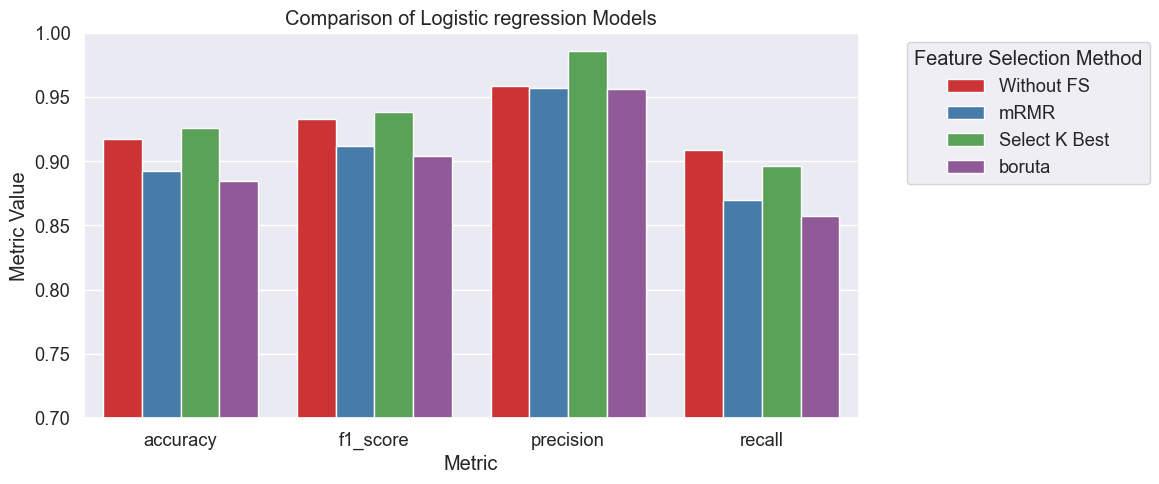

In [37]:
compareAllMetricsResults(allFS,[feature_selection.LR for feature_selection in allFS])


We can see that in the test set the select K best has the best result in almost all parameters.
And, as we expected the recall is the  lowest compared to other metrics.



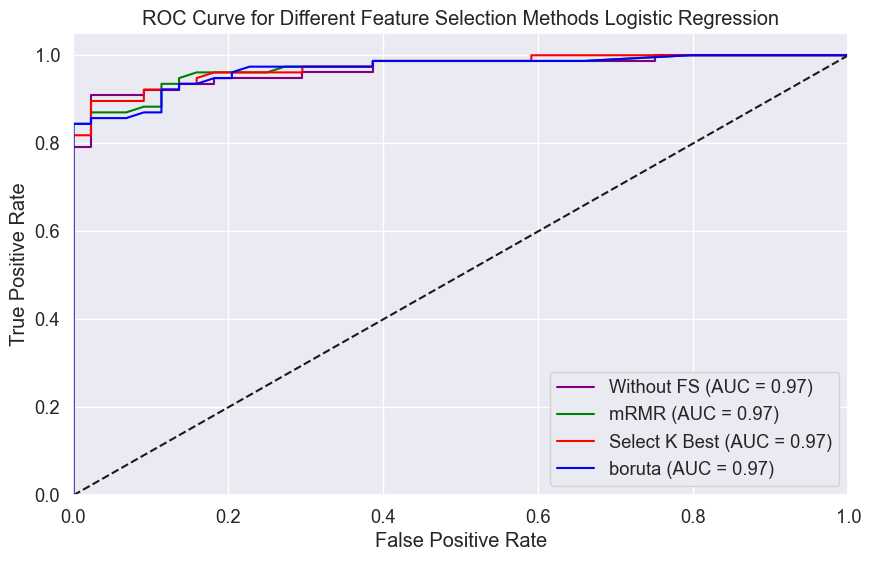

AUC for Without FS: 0.96842
AUC for mRMR: 0.97093
AUC for Select K Best: 0.97329
AUC for boruta: 0.96886


In [38]:
showROCAUC(allFS,[feature_selection.LR.model for feature_selection in allFS],  'ROC Curve for Different Feature Selection Methods Logistic Regression')


We can see that all Feature selections have pretty much the same result but still selectKBest has the best AUC.

<b> To sum up :</b> it's seems that the logistic regression gave us very good results. And the best feature selection with
logistic regression is the select k best.

### Decision Trees

<b>Decision Trees</b> organize decisions based on features in a tree-like structure:

<b>Root Node:</b> The top node represents the the initial point of decision-making.<br>
<b>Internal Nodes (Branches):</b> These nodes represent feature-based decisions. At each internal node, a decision is made based on a specific feature.<br>
<b>Leaves (Terminal Nodes):</b> Leaves provide final decisions,  such as classifying if someone is depressed or not.

<b> How to build the tree:</b>
* <b>Select a feature:</b> The tree selects the most informative features.
* <b>Splitting Data:</b> Data splits based on chosen features and values.
* <b>Recursive Process:</b> This continues until a stopping criterion, like tree depth, is met.
* <b>Classification and Prediction:</b> Trees classify or predict by following branches to reach leaf decisions.

Decision trees can provide insight into feature importance by examining how often a feature is used for splitting.A feature that was used for splitting earlier has more importance.

In [39]:
for feature_selection in  (allFS):
    feature_selection.DT= BaseModel(classifier = DecisionTreeClassifier(random_state=0) ,name= "Descion Tree")
    feature_selection.DT.train(feature_selection.newX_train,y_resampled)
    cross_val_scores = feature_selection.DT.evaluate_with_cross_validation(feature_selection.newX_train, y_resampled, scoring='accuracy', cv=5)
    print(f'Mean CV accuracy for {feature_selection.name}:  {np.mean(cross_val_scores)}')

Mean CV accuracy for Without FS:  0.8328125
Mean CV accuracy for mRMR:  0.8484375
Mean CV accuracy for Select K Best:  0.8359375
Mean CV accuracy for boruta:  0.8390625


In [40]:
acc_test_DT = []
for feature_selection in allFS:
    y_pred = feature_selection.DT.model.predict(feature_selection.newX_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"confusion matrix for Descion Trees with {feature_selection.name}: \n {conf_matrix}")
    acc_test_DT.append(accuracy_score(y_test, y_pred))
    print(f"accuracy =  {acc_test_DT[-1]:.5f}")

confusion matrix for Descion Trees with Without FS: 
 [[32 12]
 [17 60]]
accuracy =  0.76033
confusion matrix for Descion Trees with mRMR: 
 [[40  4]
 [19 58]]
accuracy =  0.80992
confusion matrix for Descion Trees with Select K Best: 
 [[37  7]
 [23 54]]
accuracy =  0.75207
confusion matrix for Descion Trees with boruta: 
 [[39  5]
 [15 62]]
accuracy =  0.83471


We can see a huge difference between the Mean CV accuracy and the test accuracy. We can assume that is because the overfitting the Decision Trees makes.
We again will expect low recall especially in the select K Best, where the FN is almost half of the TP.

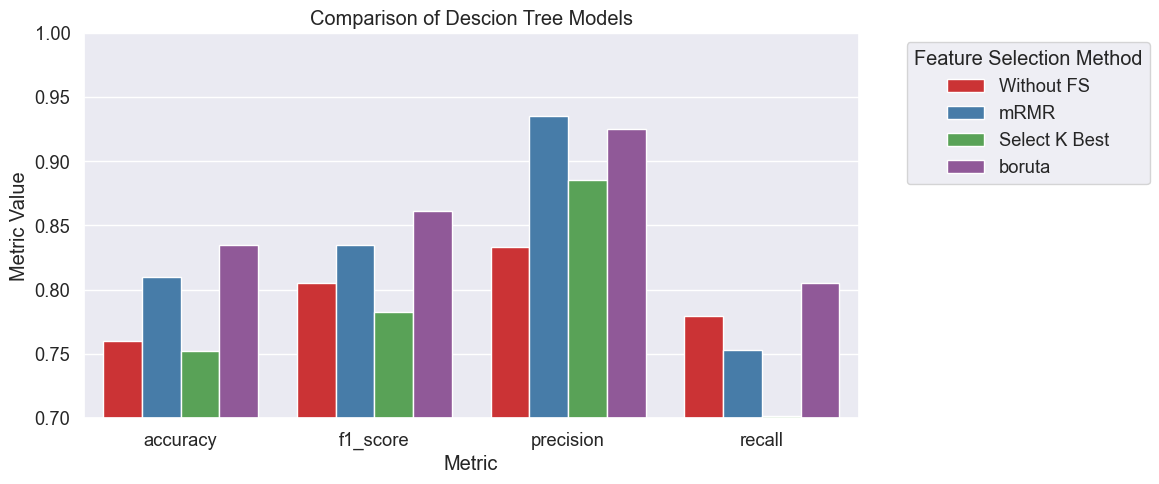

In [41]:
compareAllMetricsResults(allFS,[feature_selection.DT for feature_selection in allFS])


It is intriguing to note that the majority of our models exhibit low accuracy and recall, but high precision. This suggests that these models are proficient at correctly identifying individuals who are not experiencing depression but encounter challenges in accurately identifying those who are.
In essence, the models excel in minimizing false positives (incorrectly classifying non-depressed individuals as depressed), but they tend to miss some cases of depression (resulting in false negatives).

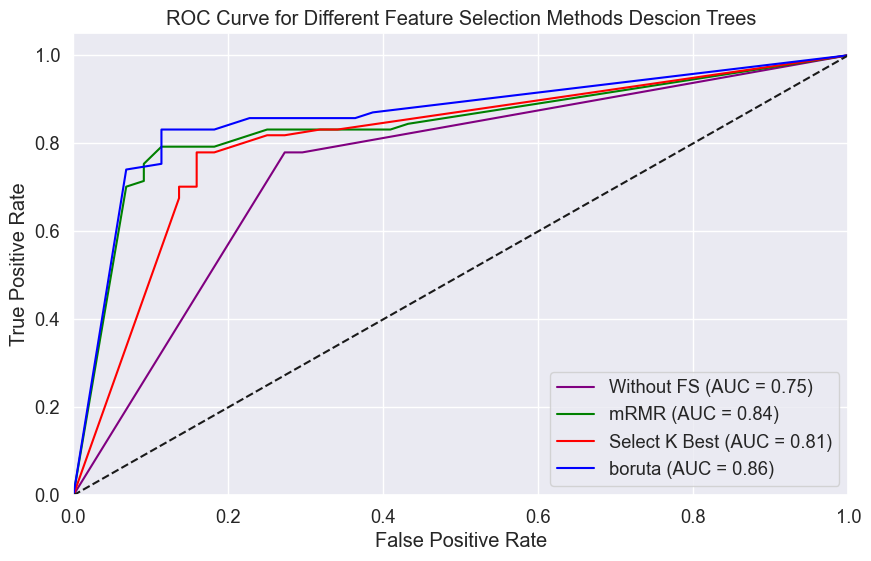

AUC for Without FS: 0.75074
AUC for mRMR: 0.84209
AUC for Select K Best: 0.81257
AUC for boruta: 0.86452


In [42]:
showROCAUC(allFS,[feature_selection.DT.model for feature_selection in allFS],  'ROC Curve for Different Feature Selection Methods Descion Trees')

<b>To sum up: </b> The models' results are fine, but not great as we got much better results in the Logistic regression.
The reason for this is probably the overfitting that occurs when using Descion Trees. The tree fits perfectly for the training data, and does not have the flexibility for changes which occur in the test set data.

To get over this problem we will see a new family of methods: <b> Ensemble Methods</b> .

### Ensemble Methods
This method combines several algorithms together to bring out better predictive results, as compared to using a single algorithm.
The objective behind the usage of an Ensemble method is that it decreases variance, bias and improves predictions in a developed model. Technically speaking, it helps in avoiding overfitting.

It is important to notice that  ensemble methods greatly increase the computational cost and complexity of the model.
This increase comes from the expertise and time required to train and maintain multiple models rather than a single model.

Two widely used ensemble methods are <b> Bagging </b> and  <b> Boosting </b>

### Bagging with Random Forest
Bagging, which stands for "Bootstrap Aggregating" exemplified by <b>Random Forest</b>, builds multiple independent models and combines their outputs through voting or averaging.
This approach reduces overfitting and enhances model stability.
Random forest aggregates the prediction results from many decision trees to make the final decision.

This is how <b> random forest </b> works:
* <b> Bootstrapping: </b> Random Forest starts by creating multiple subsets of the original dataset. Each subset is generated by randomly selecting data points with replacement from the original dataset.
* <b>Decision Trees: </b>For each subset, a decision tree is constructed.
* <b>Voting:</b> When a new data point needs to be predicted, Random Forest collects predictions from each of the decision trees. It uses a majority vote to determine the final prediction.

An essential feature of Random Forest is random feature selection. When constructing each decision tree, only a random subset of features is considered for each split.
This introduces diversity among the trees and helps reduce overfitting.

In the implemention we need to choose the number of Decision Trees we will use.
We will choose it by using k-fold cross-validation.

#### k-fold cross-validation
Here's how k-fold cross-validation works:

1. The dataset is divided into k equally sized subsamples.
2. In each iteration, one of these subsamples serves as the validation data while the remaining k − 1 subsamples become the training data.
3. This process is repeated k times, ensuring that each subsample is used once as the validation data.

After each run, we calculate the accuracy of the Random Forest model for the given number of Decision Trees.
By the end of this process, we obtain a set of accuracy scores, one for each n value tested. These scores are then used to calculate the mean accuracy.
The n value that yields the highest mean accuracy is selected as the optimal choice.

We implemented this whole process in the tune_hyperparameters function in the BaseModel class.

Initially, we will examine the impact of the 'n_estimators' parameter on accuracy.
After that we will use the tune_hyperparameters function once more, this time considering more parameters to select.

In [43]:
accuracies_FS_RF = []
param_grid_RF = {
    'n_estimators': [20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
}

for feature_selection in allFS:
    rf = BaseModel(RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42), "Random Forest")
    accuracies_FS_RF.append(rf.tune_hyperparameters(param_grid_RF ,feature_selection.newX_train,y_resampled))



Fitting 5 folds for each of 17 candidates, totalling 85 fits
Fitting 5 folds for each of 17 candidates, totalling 85 fits
Fitting 5 folds for each of 17 candidates, totalling 85 fits
Fitting 5 folds for each of 17 candidates, totalling 85 fits


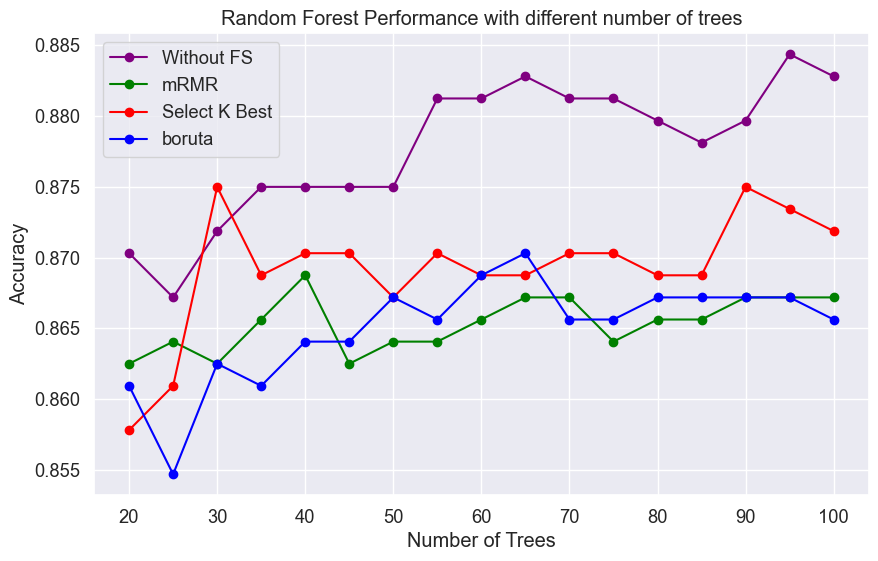

In [44]:
# Visualize the results
plt.figure(figsize=(10, 6))
colors = ['purple','green','red','blue']
for i, accResult in enumerate(accuracies_FS_RF):
    plt.plot(param_grid_RF.get('n_estimators'), accResult, label=allFS[i].name, color= colors[i],marker = 'o')

plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Random Forest Performance with different number of trees')
plt.legend()
plt.show()


As we can see the number of trees has an impact on the accuracy results.
It seems that in the begining it is good to increase the number of trees but at some point the results convergence.

Now let's find out the best hyperparameters, but this time we will consider also these parameters:

* <b> max_features</b> - The number of features to consider when looking for the best split.
    * If float, then max_features is a fraction and  max(1, int(max_features * n_features_in_)) features are considered at each split.
    * If “sqrt”, then max_features=sqrt(n_features).
    * If None, then max_features=n_features.
* <b> min_sample_leaf</b> - This determines the minimum number of leafs required to split an internal node.

In [45]:
%%time
new_param_grid_RF = {
    'n_estimators': [20,30,40,50,60,70,80,90],
    'max_features' : [None,'sqrt',7,0.5,0.1],
    'min_samples_leaf' : [10,15,20,25,30,35,40]
}

new_accuracies_FS_RF = []
for feature_selection in allFS:
    rf = BaseModel(RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42), "Random Forest")
    new_accuracies_FS_RF.append(rf.tune_hyperparameters(new_param_grid_RF ,feature_selection.newX_train,y_resampled))
    feature_selection.RF = rf

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
Fitting 5 folds for each of 280 candidates, totalling 1400 fits
Fitting 5 folds for each of 280 candidates, totalling 1400 fits
Fitting 5 folds for each of 280 candidates, totalling 1400 fits
CPU times: total: 13min 38s
Wall time: 16min 36s


Let's identify the optimal parameters and the associated validation scores.

In [46]:
for curr_accuracies_FS_RF, feature_selection in zip(new_accuracies_FS_RF,allFS):
    RF_curr = feature_selection.RF.model
    print(f'{feature_selection.name} \nn_estimators: {RF_curr.n_estimators}, max_features: {RF_curr.max_features}, min_samples_leaf: {RF_curr.min_samples_leaf} with validation accuracy : {max(curr_accuracies_FS_RF)}' )
    print()

Without FS 
n_estimators: 70, max_features: 0.1, min_samples_leaf: 15 with validation accuracy : 0.89375

mRMR 
n_estimators: 50, max_features: 0.1, min_samples_leaf: 20 with validation accuracy : 0.89375

Select K Best 
n_estimators: 60, max_features: 0.1, min_samples_leaf: 30 with validation accuracy : 0.896875

boruta 
n_estimators: 20, max_features: 0.1, min_samples_leaf: 10 with validation accuracy : 0.89375



All cross-validation accuracy seem to be almost similar.
Let's see the performence of the models on the test set.

In [47]:
acc_test_RF = []
for feature_selection in allFS:
    y_pred = feature_selection.RF.model.predict(feature_selection.newX_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"confusion matrix for Random forest {feature_selection.name}: \n {conf_matrix}")
    acc_test_RF.append(accuracy_score(y_test, y_pred))
    print(f"accuracy =  {acc_test_RF[-1]:.5f}")



confusion matrix for Random forest Without FS: 
 [[39  5]
 [ 9 68]]
accuracy =  0.88430
confusion matrix for Random forest mRMR: 
 [[44  0]
 [12 65]]
accuracy =  0.90083
confusion matrix for Random forest Select K Best: 
 [[42  2]
 [12 65]]
accuracy =  0.88430
confusion matrix for Random forest boruta: 
 [[42  2]
 [14 63]]
accuracy =  0.86777


mRMR achieved the highest accuracy among the feature selection methods. However, it's interesting to note that both the "Without Feature Selection" and "SelectKBest" methods yielded the same accuracy. In this scenario, the preference leans towards the "Without Feature Selection" model due to its higher F1 score.
A closer look at the confusion matrices reinforces this choice, as "SelectKBest" exhibits more false negatives (FN) compared to "Without Feature Selection".


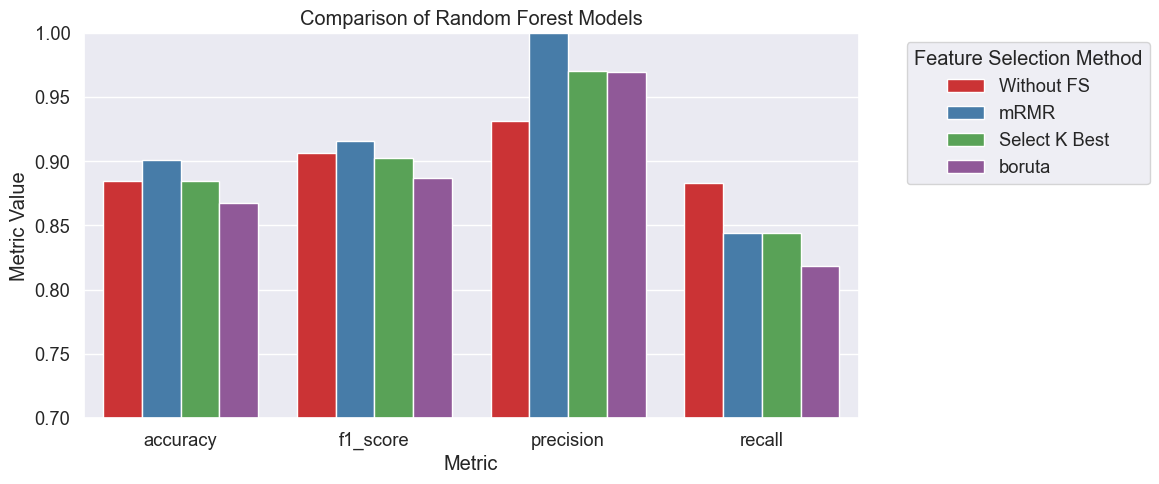

In [48]:
compareAllMetricsResults(allFS,[feature_selection.RF for feature_selection in allFS])

In the mRMR the precision is equal to 1, due to zero FP mistakes. That means we can determine very well who is not depressed

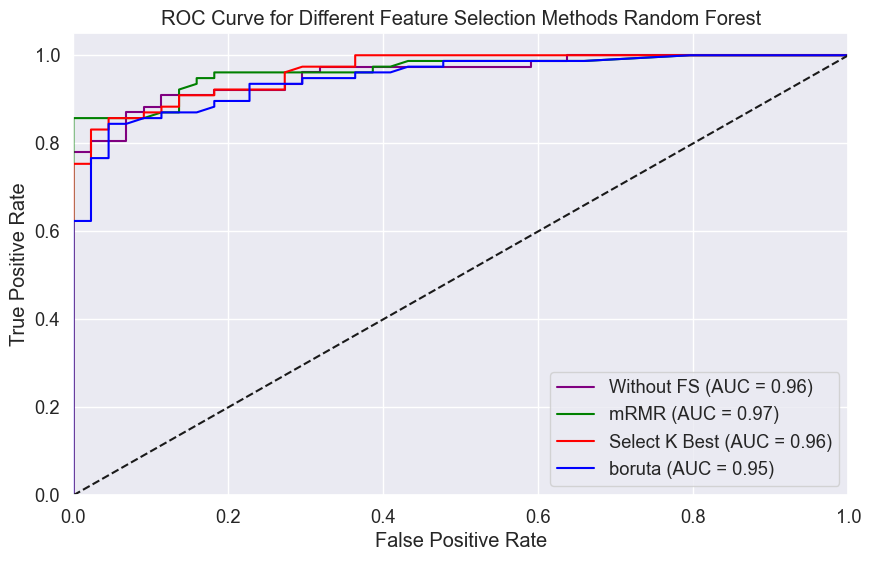

AUC for Without FS: 0.95720
AUC for mRMR: 0.96532
AUC for Select K Best: 0.96473
AUC for boruta: 0.94761


In [49]:
showROCAUC(allFS,[feature_selection.RF.model for feature_selection in allFS],  'ROC Curve for Different Feature Selection Methods Random Forest')

Now, let's evaluate whether these results surpass the performance of the standard decision tree algorithm:

In [50]:
for i,feature_selection in enumerate (allFS):
    print(f'{feature_selection.name} Random forest accuracy: {acc_test_RF[i]:.2f} compare to decsion tree accuracy {acc_test_DT[i]:.2f}')


Without FS Random forest accuracy: 0.88 compare to decsion tree accuracy 0.76
mRMR Random forest accuracy: 0.90 compare to decsion tree accuracy 0.81
Select K Best Random forest accuracy: 0.88 compare to decsion tree accuracy 0.75
boruta Random forest accuracy: 0.87 compare to decsion tree accuracy 0.83


As we expectedת 'e can see a great difference in the accuracy in all feature selection methods.
We will use statistical tests to check whether there is a significant difference between Random Forest and Decision Tree models, or if any observed differences are negligible or occurred randomly.

For that we will use the paired t-test.

<b> The paired t-test </b> is a statistical hypothesis test used to determine if there is a significant difference between the means of two related groups of data.
The t-statistic is a measure of how far apart the means of the two groups are, relative to the variability within each group. It quantifies the difference between the sample means and provides a way to assess whether this difference is statistically significant.<br>
<b>The p-value</b> is a crucial result of the t-test. If the p-value is small, it provides evidence that there is a significant difference.<br>
We will do the test on all the feature selection methods with the function evaluate_with_cross_validation in the BaseModel class.

If the p-value is large, it suggests that the observed difference in means could plausibly have occurred by random chance.

In our case we will expect a low p-value.

In [51]:

from scipy import stats

RFEvaluate  = [acc for acc in feature_selection.RF.evaluate_with_cross_validation(feature_selection.newX_train,y_resampled) for feature_selection in allFS]
DTEvaluate  = [acc for acc in feature_selection.DT.evaluate_with_cross_validation(feature_selection.newX_train,y_resampled) for feature_selection in allFS]
t_statistic, p_value = stats.ttest_rel(RFEvaluate, DTEvaluate)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant difference between Random Forest and Decision Tree models.")
else:
    print("There is no statistically significant difference between Random Forest and Decision Tree models.")


T-statistic: 12.061042658078945
P-value: 2.3779946138985644e-10
There is a statistically significant difference between Random Forest and Decision Tree models.


And we were right we found a way to improve the Decision Tree model and it is exciting!!


<b>To sum up: </b> The models results are much better then the standard Decision Tree models in all aspects.<br>
We saw that in the cross validation score almost all the feature selection models got the same score, and in the test set the mRMR has the best performance.

Let's see another Ensemble Method for improving the decision tree models - <b> boosting</b>.

### Boosting
Boosting is an ensemble technique, which converts the weak machine learning models into strong models.
This technique learns from the previous predictor mistakes of data to make better predictions in future by improving the performance of the model.

You start by creating a model from the training data.
Then, you create a second model from the previous one by trying to reduce the errors from the previous model.
Models are added sequentially, each correcting its predecessor, until the training data is predicted perfectly or the maximum number of models have been added.

Boosting basically tries to reduce the bias error which arises when models are not able to identify relevant trends in the data. This happens by evaluating the difference between the predicted value and the actual value.


It exists in many forms, that includes Adaptive Boosting (AdaBoost), Gradient Boosting, XGBoost (Extreme Gradient Boosting).
We will only look at the <b>AdaBoost</b>.

### Adaptive Boosting (AdaBoost)
This is how AdaBoost works:

* <b> Base Learners :</b> AdaBoost combines the predictions from multiple base learners to create a stronger, more accurate model.
* <b>Weighted Data: </b>In each iteration, AdaBoost assigns weights to the data points. Initially, all data points have equal weights.
* <b>Model Training: </b>AdaBoost fits a weak base learner to the training data. It focuses on the data points that were misclassified in the previous iteration by assigning higher weights to them. This makes the base learner concentrate on the "hard" examples.
* <b>Weighted Voting: </b>After each iteration, the base learner's performance is evaluated. Data points that were correctly classified have their weights reduced, while misclassified points have their weights increased. This means that the next base learner will focus more on the previously misclassified examples.
* <b>Iterative Process:</b> Steps 3 and 4 are repeated for a predefined number of iterations or until the model achieves a desired level of accuracy. Each new base learner is trained on the modified dataset with updated weights.
* <b>Final Model: </b>The individual base learners are combined by giving them weights based on their performance. More accurate base learners are assigned higher weights, and less accurate ones are assigned lower weights.
* <b>Predictions:</b> To make predictions, AdaBoost combines the predictions of all base learners, with more accurate models having a greater say in the final prediction.




In [52]:
# Define a parameter grid for AdaBoost
param_grid_AdaBoost = {
    'n_estimators': [10,15,20,25,30,35,40,45,50,55,60],
}

accuracies_FS_AdaBoost = []

for feature_selection in allFS:
    # Initialize the base classifier (you can adjust the parameters as needed)
    base_classifier = DecisionTreeClassifier(max_depth=1)
    # Initialize the AdaBoost classifier with the base classifier and parameter grid
    adaboost_classifier = BaseModel(AdaBoostClassifier(estimator = base_classifier, random_state=42), "AdaBoost")
    # Tune hyperparameters using the given parameter grid
    accuracies_FS_AdaBoost.append(adaboost_classifier.tune_hyperparameters(param_grid_AdaBoost, feature_selection.newX_train, y_resampled))

    # Store the trained AdaBoost classifier in the feature selection object
    feature_selection.AdaBoost = adaboost_classifier


Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Fitting 5 folds for each of 11 candidates, totalling 55 fits


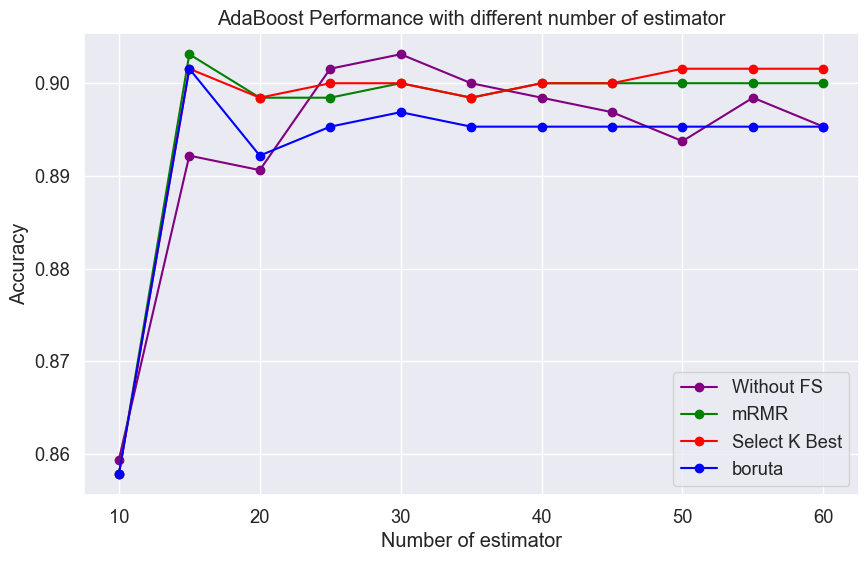

In [53]:
# Visualize the results
plt.figure(figsize=(10, 6))
colors = ['purple','green','red','blue']
for i, accResult in enumerate(accuracies_FS_AdaBoost):
    plt.plot(param_grid_AdaBoost.get('n_estimators'), accResult, label=allFS[i].name, color= colors[i],marker = 'o')

plt.xlabel('Number of estimator')
plt.ylabel('Accuracy')
plt.title('AdaBoost Performance with different number of estimator')
plt.legend()
plt.show()

We can see that in the beginning the accuracy experiences a significant surge.
However, as we increase the number of estimators, there comes a point where this change no longer significantly impacts accuracy.

The initial rapid increase can be attributed to the fact that with more estimators, the model focuses on the instances that the current ensemble finds difficult to classify.<br>
However there's a point of diminishing returns. As you add more weak learners, they may start fitting the noise in the data and overfitting. Thus, the gains in performance decrease or do not change after reaching a certain number of weak learners.


In [54]:
for feature_selection,accuracy in zip(allFS,accuracies_FS_AdaBoost):
    print(f"Best accurate for {feature_selection.name}: number of estimators:{feature_selection.AdaBoost.model.n_estimators}")
    print(f"Cross validation accurate: {max(accuracy)}")


Best accurate for Without FS: number of estimators:30
Cross validation accurate: 0.903125
Best accurate for mRMR: number of estimators:15
Cross validation accurate: 0.903125
Best accurate for Select K Best: number of estimators:15
Cross validation accurate: 0.9015625
Best accurate for boruta: number of estimators:15
Cross validation accurate: 0.9015625


In [55]:
acc_test_AdaBoost = []

for feature_selection in allFS:
    y_pred = feature_selection.AdaBoost.model.predict(feature_selection.newX_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"confusion matrix for adaBoost {feature_selection.name}: \n {conf_matrix}")
    acc_test_AdaBoost.append(accuracy_score(y_test, y_pred))
    print(f"accuracy =  {acc_test_AdaBoost[-1]:.5f}")



confusion matrix for adaBoost Without FS: 
 [[37  7]
 [ 5 72]]
accuracy =  0.90083
confusion matrix for adaBoost mRMR: 
 [[41  3]
 [10 67]]
accuracy =  0.89256
confusion matrix for adaBoost Select K Best: 
 [[41  3]
 [10 67]]
accuracy =  0.89256
confusion matrix for adaBoost boruta: 
 [[40  4]
 [10 67]]
accuracy =  0.88430


The results seems to be similar to the Random Forest model.

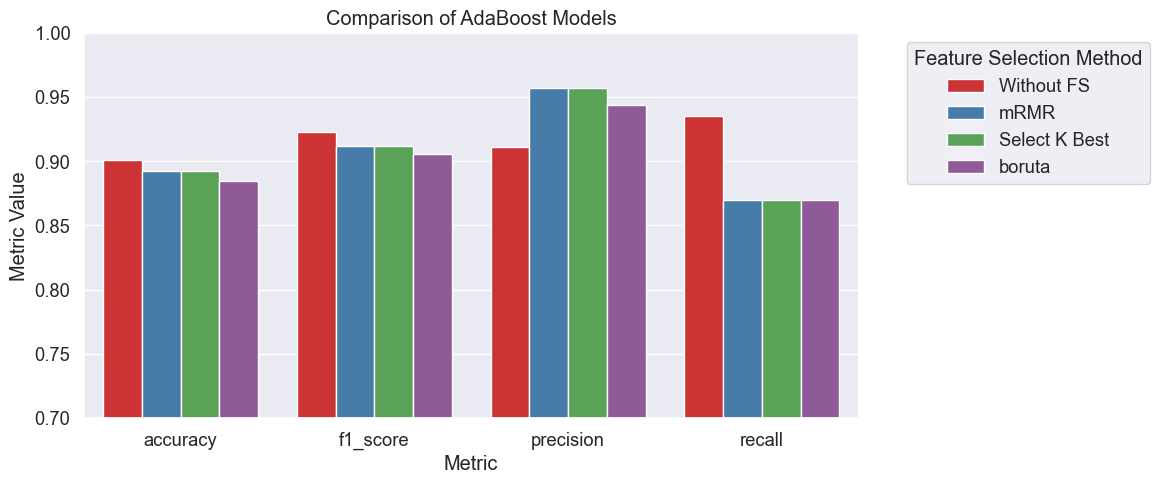

In [56]:
compareAllMetricsResults(allFS,[feature_selection.AdaBoost for feature_selection in allFS])

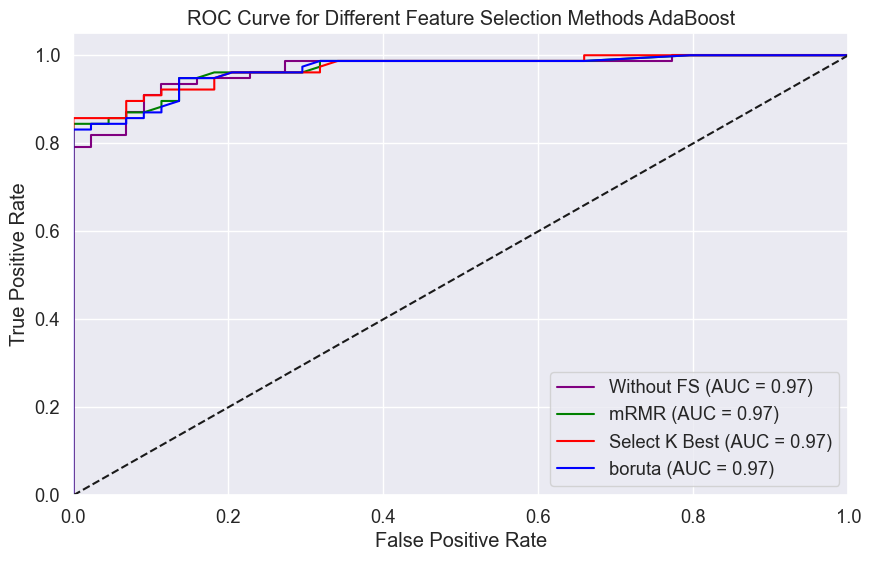

AUC for Without FS: 0.96724
AUC for mRMR: 0.96886
AUC for Select K Best: 0.97048
AUC for boruta: 0.96768


In [57]:
showROCAUC(allFS,[feature_selection.AdaBoost.model for feature_selection in allFS],  'ROC Curve for Different Feature Selection Methods AdaBoost')

The AUC is a little higher then in the Random Forest model.

We want again to compare the results to the standard Decision Tree:

In [58]:
for i,feature_selection in enumerate (allFS):
    print(f'{feature_selection.name} AdaBoost accuracy: {acc_test_AdaBoost[i]:.2f} compare to decsion tree accuracy {acc_test_DT[i]:.2f}')


Without FS AdaBoost accuracy: 0.90 compare to decsion tree accuracy 0.76
mRMR AdaBoost accuracy: 0.89 compare to decsion tree accuracy 0.81
Select K Best AdaBoost accuracy: 0.89 compare to decsion tree accuracy 0.75
boruta AdaBoost accuracy: 0.88 compare to decsion tree accuracy 0.83


In [59]:

from scipy import stats

AdaBoostEvaluate  = [acc for acc in feature_selection.AdaBoost.evaluate_with_cross_validation(feature_selection.newX_train,y_resampled) for feature_selection in allFS]
DTEvaluate  = [acc for acc in feature_selection.DT.evaluate_with_cross_validation(feature_selection.newX_train,y_resampled) for feature_selection in allFS]
t_statistic, p_value = stats.ttest_rel(AdaBoostEvaluate, DTEvaluate)

# Print the results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant difference between AdaBoost and Decision Tree models.")
else:
    print("There is no statistically significant difference between AdaBoost and Decision Tree models.")


T-statistic: 11.027239001672179
P-value: 1.065361351875365e-09
There is a statistically significant difference between AdaBoost and Decision Tree models.


And again we manage to improve the standard Decision Tree model.

We want to sum up the performance of our models that are based on Decision trees. To do so we will use the evaluate_with_cross_validation function we implement in the BaseModel class.
In that way we can ensure that the performance does not depend on the data we check. We will use the f1 score for comparing.

In [60]:
combineEvaluation = {"DT" : [np.mean(feature_selection.DT.evaluate_with_cross_validation(feature_selection.newX_train,y_resampled, scoring = 'f1')) for feature_selection in allFS],
        "RF" : [np.mean(feature_selection.RF.evaluate_with_cross_validation(feature_selection.newX_train,y_resampled, scoring = 'f1')) for feature_selection in allFS],
       "AdaBoost":[np.mean(feature_selection.AdaBoost.evaluate_with_cross_validation(feature_selection.newX_train,y_resampled, scoring = 'f1')) for feature_selection in allFS ]}

In [61]:
colormap = [random.choice(list(mcolors.CSS4_COLORS.keys())) for i in range(len(combineEvaluation))]


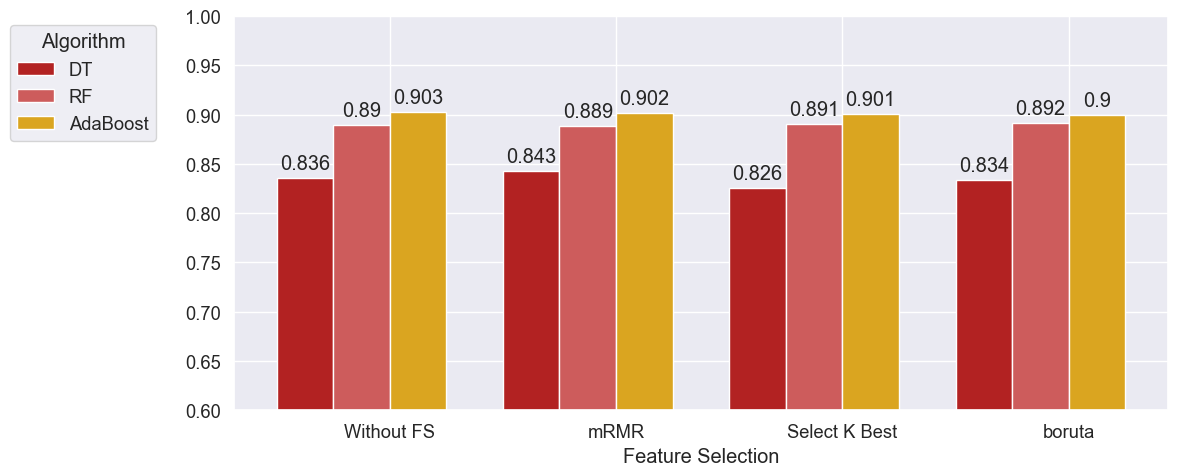

In [62]:
# Get the feature selection types (FS) and algorithm types
feature_selections = [feature_selection.name for feature_selection in allFS]
algorithm_types = list(combineEvaluation.keys())

width = 0.25  # the width of the bars
x = np.arange(len(feature_selections))
group_width = len(algorithm_types) * width
group_indices = np.arange(0, len(feature_selections))

fig, ax = plt.subplots(figsize=(12, 5))


for i, algorithm in enumerate(algorithm_types):
    measurements = [round(combineEvaluation[algorithm][j],3) for j in range(len(allFS))]
    rects = ax.bar(x + i * width, measurements, width, label=algorithm, color=colormap[i])
    ax.bar_label(rects, padding=3)

# Set custom x-axis tick labels and tick positions
ax.set_xticks(x + group_width / 2)
ax.set_xticklabels(feature_selections)
ax.set_xlabel('Feature Selection')
ax.legend(title="Algorithm",bbox_to_anchor=(-0.25, 1), loc='upper left')
ax.set_ylim(0.6,1)
plt.tight_layout()
plt.show()


As we can see, both ensembled methods provide better results than the Decision tree model. <br>
Another interesting fact is that even though on the test set both Random forest and AdaBoost have shown similar results, on the cross validation the AdaBoost has shown  slightly better results, and this is a reason why we will prefer this model, because the cross validation ensures us the result does not depend on the specific test set.

We finished with the desicion trees algorithms and as we saw we managed to improve the basic decision tree model.

It is time to explore other types of models!!



### K-Nearest Neighbors (KNN)


<b> K-Nearest Neighbors (KNN) </b> is a widely employed algorithm in both classification and regression tasks. In this instance-based learning method, a new data point is classified by comparing it to the most similar instances within the training dataset.

This similarity is determined using distance measures, such as Euclidean or Manhattan distance, which assess how close or dissimilar data points are in the feature space.
We will use the Minkowski Distance which  extends other distance metrics like Euclidean Distance and Manhattan Distance.

The key parameter in KNN is 'K,' which represents the number of nearest neighbors considered when making predictions.
By adjusting the value of 'K,' the algorithm can adapt to the local characteristics of the data.
A smaller 'K' tends to yield more flexible and potentially noisy predictions, while a larger 'K' offers smoother and more stable predictions.
To choose the right 'K' value in the KNN algorithm we will use k-fold cross-validation.
This technique aids in assessing how different values of 'K' impact the performance of our model.

We will do this process with each of the selection technique, and visualise the results.

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


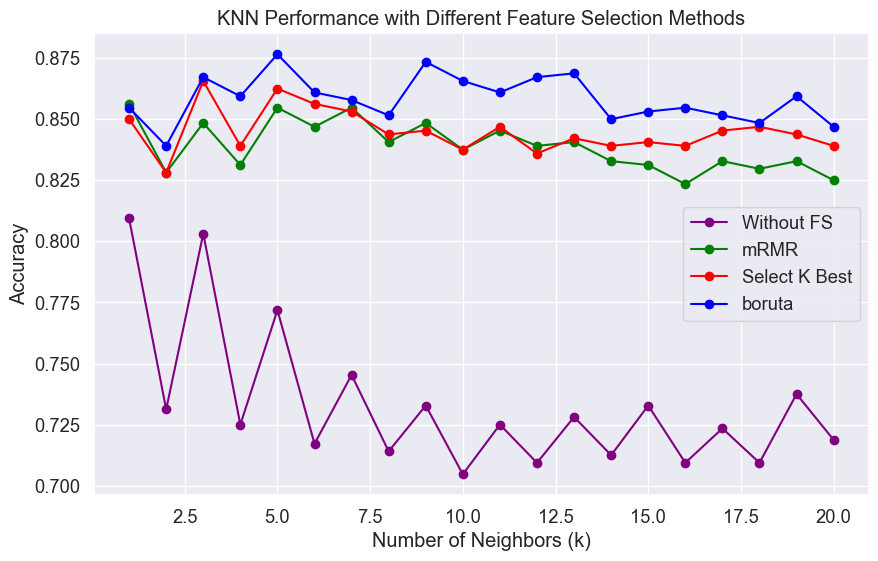

In [92]:
maxK = 20
accuracies_FS_KNN = []
for feature_selection in allFS:
    knn = BaseModel(KNeighborsClassifier(), "KNN")
    accuracies_FS_KNN.append(knn.tune_hyperparameters({'n_neighbors': range(1, maxK+1), 'metric': ['minkowski']} ,feature_selection.newX_train,y_resampled))
    feature_selection.KNN = knn

# Visualize the results
plt.figure(figsize=(10, 6))
colors = ['purple','green','red','blue']
for i, accResultKnn in enumerate(accuracies_FS_KNN):
    plt.plot([ i for i in range(1,len(accResultKnn)+1)], accResultKnn, label=allFS[i].name, color= colors[i],marker = 'o')

plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Performance with Different Feature Selection Methods')
plt.legend()
plt.show()


As we can see by applying different feature selection techniques, accuracies have been increased dramatically.
It is not a suprise based on the fact that without feature selection our data contains a lot of noise that impacts dramatically on the results of the KNN algorithm.
It is make sence that without feature selection when we have a lot of noise one neighbor will be the optimal choice. We can also see that for even Ks the accuracy is lower. It's probably because there are a lot of cases where the neighbors rule each other out.

The best results with the cross validation is the boruta selection, with k = 5.


In [93]:
for curr_accuracies, feature_selection in  zip(accuracies_FS_KNN,allFS):
    print(f'Best Accuracy on cross validation with KNN (k = {feature_selection.KNN.model.n_neighbors}) {feature_selection.name}: {max(curr_accuracies)}')

Best Accuracy on cross validation with KNN (k = 1) Without FS: 0.809375
Best Accuracy on cross validation with KNN (k = 1) mRMR: 0.85625
Best Accuracy on cross validation with KNN (k = 3) Select K Best: 0.865625
Best Accuracy on cross validation with KNN (k = 5) boruta: 0.8765625


In [65]:
for feature_selection in allFS:
    y_pred = feature_selection.KNN.model.predict(feature_selection.newX_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"confusion matrix for KNN {feature_selection.name}: \n {conf_matrix}")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"accuracy =  {accuracy:.5f}")


confusion matrix for KNN Without FS: 
 [[40  4]
 [29 48]]
accuracy =  0.72727
confusion matrix for KNN mRMR: 
 [[37  7]
 [15 62]]
accuracy =  0.81818
confusion matrix for KNN Select K Best: 
 [[40  4]
 [14 63]]
accuracy =  0.85124
confusion matrix for KNN boruta: 
 [[41  3]
 [12 65]]
accuracy =  0.87603




<b> Best Model: </b> The KNN model with k=5 and the "boruta" feature selection method achieved the highest accuracy, with an accuracy of 0.876.



It is evident that the "boruta" feature selection method with k=5 achieved the highest accuracy, outperforming other methods.
"Select K Best" with k=3 also performed well, while the "mRMR" method showed intermediate performance. The model without feature selection ("Without FS") had the lowest accuracy.


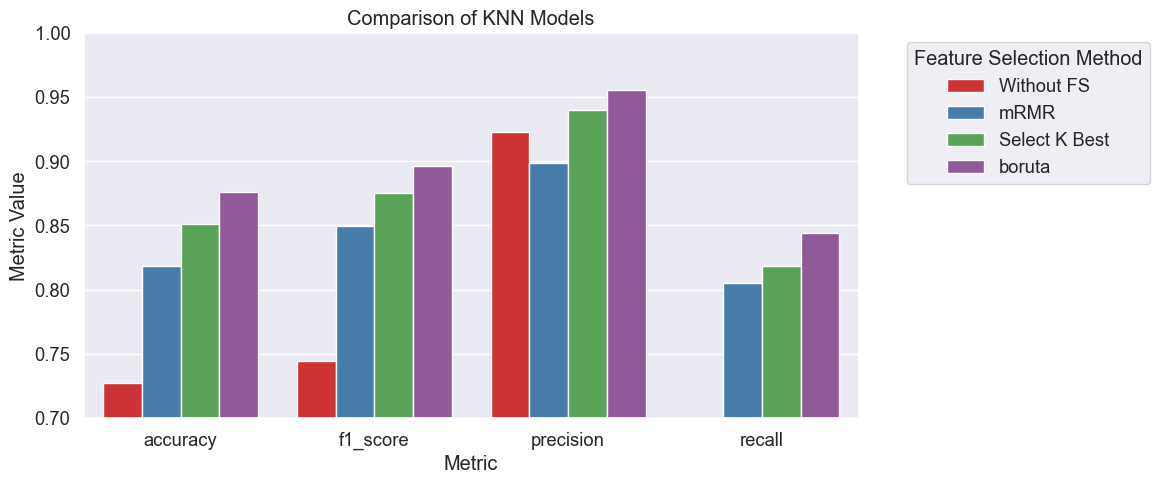

In [66]:
compareAllMetricsResults(allFS,[feature_selection.KNN for feature_selection in allFS])

All models have high precision that means they do not have a greate mistake when they decide someone is depressed. On the other hand all of them also have a low recall that means they dont know to say if someone depressed.

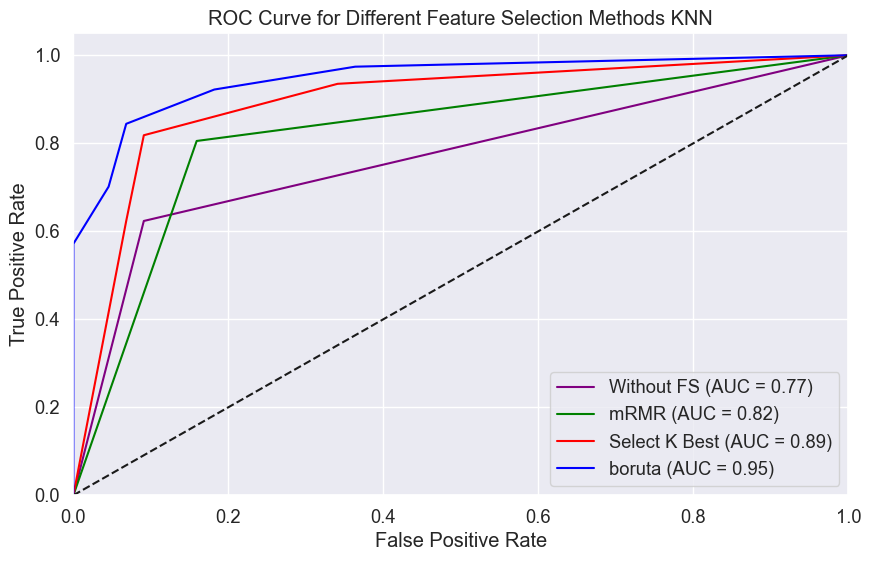

AUC for Without FS: 0.76623
AUC for mRMR: 0.82305
AUC for Select K Best: 0.89448
AUC for boruta: 0.94731


In [67]:
showROCAUC(allFS,[feature_selection.KNN.model for feature_selection in allFS],  'ROC Curve for Different Feature Selection Methods KNN')

Here again the best AUC belongs to the boruta feature selection, we can see the results are lower from what we are used to in the earlier algorithms.



### Support Vector Machines (SVM)

<b> SVM </b>  works by finding the best possible decision boundary or hyperplane that separates different classes of data points. The "support vectors" are the data points that are closest to this boundary and play a crucial role in defining it.

SVM aims to find a hyperplane that maximizes the margin between the support vectors of different classes. This margin represents the confidence in the model's predictions.<br>
When the problems can’t be solved using linear hyperplane SVM is using the <b> kernel trick </b>.
The kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, it converts non-separable problems to separable problems by adding additional dimensions to it.

####  SVM Hyperparameters
SVM classifier has several hyperparameters that we control and can lead to diffrents results.
As  we did in KNN we will find the best Hyperparameters for each feature selection with cross validation.
We have three main hyperparameters that we control:

<b> The kernel function: </b>
If we can draw a line to separate our classes, then a <b> linear kernel </b> will be a good option, if we need a curve, then a <b> polynomial kernel</b>  might be the best choice, if our data has circular shapes, then a <b> Radial Basis </b> Function or <b> RBF kernel</b>  will suit the data better, if there are values above and below a threshold, a <b> sigmoid kernel </b> might separate the classes better.

<b> The C Hyperparameter: </b>  
The C parameter is inversely proportional to the margin size, this means that the larger the value of C, the smaller the margin, and, conversely, the smaller the value of C, the larger the margin.
The C parameter can be used along with any kernel, it tells the algorithm how much to avoid misclassifying each training sample, due to that, it is also known as regularization.

<b> The Gamma Hyperparameter: </b>

Gamma is a positive real number that represents the kernel coefficient in SVMs. It determines how far the influence of a single training example reaches. In other words, it controls the shape and flexibility of the decision boundary.

Effect on Decision Boundary:
* <b> Small Gamma (γ):</b>  When gamma is small, the influence of each training example is widespread, and the decision boundary tends to be more smooth and linear. It results in a larger margin and may underfit the training data.
* <b> Large Gamma (γ):</b>  Conversely, when gamma is large, the influence of each training example is limited to nearby points, creating a more complex, nonlinear decision boundary. This can lead to a smaller margin and a risk of overfitting the training data.


We will use a grid search and cross validation to chosse the best Hyperparameters for each feature selection we employed.


In [68]:
%%time
# Define a dictionary of hyperparameters and their possible values
param_grid_SVM = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.05,0.1,0.5, 1,5],
    'gamma': [0.01, 0.1, 1, 'scale', 'auto'],
}

best_score_SVM = []
for feature_selection in allFS:
    svm = BaseModel(SVC(probability=True, random_state=0), "SVM")
    best_score_SVM.append(max(svm.tune_hyperparameters(param_grid_SVM ,feature_selection.newX_train,y_resampled, scoring= 'f1')))
    feature_selection.SVM = svm

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Fitting 5 folds for each of 75 candidates, totalling 375 fits
Fitting 5 folds for each of 75 candidates, totalling 375 fits
Fitting 5 folds for each of 75 candidates, totalling 375 fits
CPU times: total: 1min 25s
Wall time: 1min 29s


In [69]:
# show the selected hyperparameters
for curr_Best_score, feature_selection in zip (best_score_SVM,allFS):
    print(f"{feature_selection.name}: C: {feature_selection.SVM.model.C} , k: {feature_selection.SVM.model.kernel} , g: {feature_selection.SVM.model.gamma},\nF1 cross validation score {curr_Best_score:.5f}")


Without FS: C: 1 , k: rbf , g: 0.1,
F1 cross validation score 0.89817
mRMR: C: 0.5 , k: rbf , g: scale,
F1 cross validation score 0.89982
Select K Best: C: 0.1 , k: rbf , g: scale,
F1 cross validation score 0.89576
boruta: C: 0.05 , k: rbf , g: scale,
F1 cross validation score 0.89830


According to the cross validation F1 score. All model seems the same.
Les't see what will be the results on the test set of each one of the models.

In [70]:
for feature_selection in allFS:
    y_pred = feature_selection.SVM.model.predict(feature_selection.newX_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"confusion matrix for SVM {feature_selection.name}: \n {conf_matrix}")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"accuracy =  {accuracy:.5f}")


confusion matrix for SVM Without FS: 
 [[36  8]
 [ 8 69]]
accuracy =  0.86777
confusion matrix for SVM mRMR: 
 [[39  5]
 [ 8 69]]
accuracy =  0.89256
confusion matrix for SVM Select K Best: 
 [[39  5]
 [ 7 70]]
accuracy =  0.90083
confusion matrix for SVM boruta: 
 [[39  5]
 [ 7 70]]
accuracy =  0.90083


In first look, it's seems that the accuracy is the same in Select K Best and in boruta. The validation score we found before, of the boruta is slight higher.
When we explore the AUC of each one of them we will see a little difference. We will get to that later.

The bar chart below illustrates the accuracte values for different feature selection methods.
The mRMR achieves the best score, and without feature selection, is yet again is not as good as all the other feature selection methods.

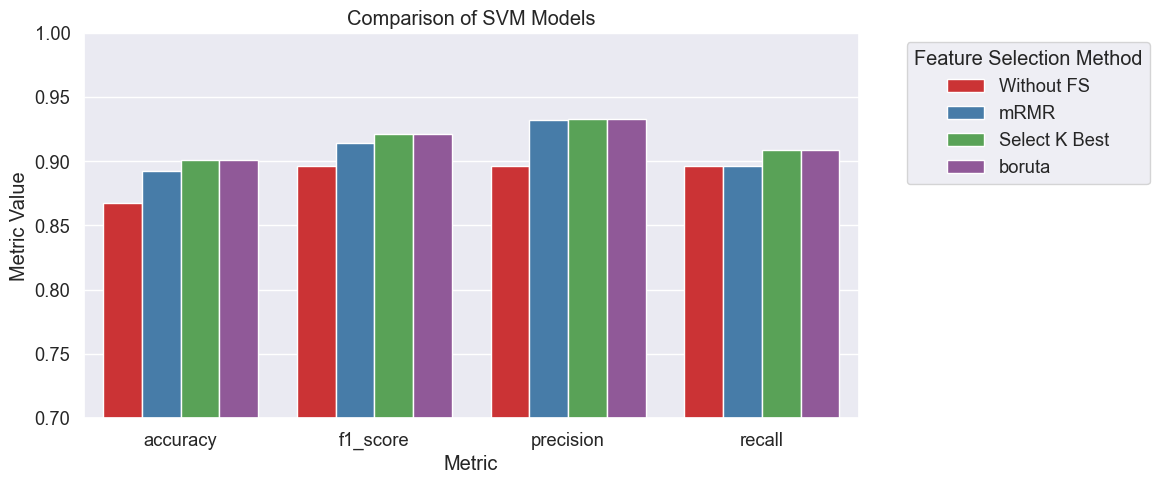

In [71]:
compareAllMetricsResults(allFS,[feature_selection.SVM for feature_selection in allFS])

It seems that also in all other metric parameters the boruta and the select K Best are the same. We need  to examine the AUC.

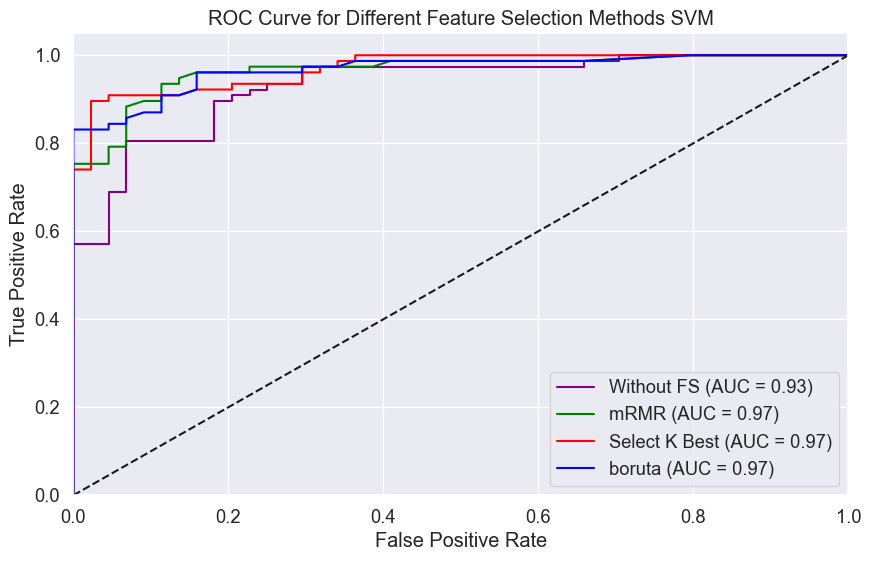

AUC for Without FS: 0.93211
AUC for mRMR: 0.96532
AUC for Select K Best: 0.97034
AUC for boruta: 0.96709


In [72]:
showROCAUC(allFS,[feature_selection.SVM.model for feature_selection in allFS],  'ROC Curve for Different Feature Selection Methods SVM')

According to the AUC we will prefer to use the model with the Select K Best feature selection.


<b> To sum up:</b> SVM showed reasonable prediction performance.
Without Feature selection it performs the worst results because of all the noise. 
The cross validation score shows the boruta is better while the AUC on the test set shows that select K best is better.

### Voting
We have reached the last model we will use.
The Voting classifier aggregates the output of different base classifiers, and it is one of the simplest ensemble learning techniques.

But we might not want to let everybody vote. If some classifiers are not good, they might change the result of the vote.
We only want strong classifiers to vote.

To decide what is the best combinations, we apply all of them and we used the evaluate_with_cross_validation function with cv = 10. <br>
The combination with the highest accuracy will be the classifiers that will vote.

We can also decide if we want hard voting or soft voting. If 'hard' is selected, voting utilizes predicted class labels for majority rule voting. Alternatively, if 'soft' is chosen, voting predicts the class label based on the argmax of the sums of the predicted probabilities.<br>

All our classifiers have predicted probabilities so we will use the soft voting.



In [73]:
%%time

for feature_selection in allFS:
    allAlgo = [a for a in feature_selection.getalgorithms() if a!= None and a.name != 'Voting'] #remove the voting algorithm that does not exsit yet
    maxACC= 0
    print(feature_selection.name)

    for i in range(1,len(allAlgo) + 1):
        for algorithm_combination  in itertools.combinations(allAlgo, i): # iterate over all  the possible combinations
            eclf2 = BaseModel(VotingClassifier(estimators=[(a.name, a.model) for a in algorithm_combination], voting='soft'),"Voting")
            eclf2.train(feature_selection.newX_train, y_resampled)
            acctemp = np.mean(eclf2.evaluate_with_cross_validation(feature_selection.newX_train, y_resampled,cv =10))
            if(maxACC < acctemp):
                maxACC = acctemp
                feature_selection.Voting = eclf2
                
    print('Participants in the voting model:')
    print([a[0] for a in feature_selection.Voting.model.estimators])
    print(f'Highest score with cross vaildation is: {maxACC}')
    print()

Without FS
Participants in the voting model:
['Logistic regression', 'Random Forest', 'SVM']
Highest score with cross vaildation is: 0.9

mRMR
Participants in the voting model:
['Logistic regression', 'SVM']
Highest score with cross vaildation is: 0.903125

Select K Best
Participants in the voting model:
['Logistic regression', 'Random Forest']
Highest score with cross vaildation is: 0.90625

boruta
Participants in the voting model:
['Logistic regression', 'KNN', 'SVM']
Highest score with cross vaildation is: 0.90625

CPU times: total: 5min 22s
Wall time: 5min 58s


It's intriguing to note that Logistic Regression consistently features in all the voting models, indicating its consistently strong performance and reliability.

In [74]:
for feature_selection in allFS:
    y_pred = feature_selection.Voting.model.predict(feature_selection.newX_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"confusion matrix for Voting {feature_selection.name}: \n {conf_matrix}")
    accuracy = accuracy_score(y_test, y_pred)
    print(f"accuracy =  {accuracy:.5f}")

confusion matrix for Voting Without FS: 
 [[40  4]
 [ 6 71]]
accuracy =  0.91736
confusion matrix for Voting mRMR: 
 [[40  4]
 [ 8 69]]
accuracy =  0.90083
confusion matrix for Voting Select K Best: 
 [[43  1]
 [10 67]]
accuracy =  0.90909
confusion matrix for Voting boruta: 
 [[40  4]
 [ 8 69]]
accuracy =  0.90083


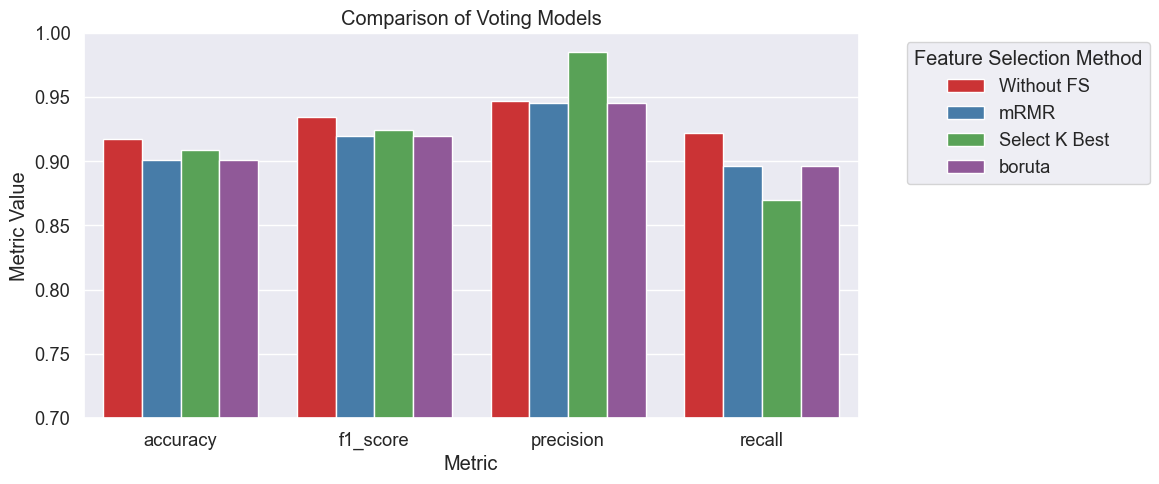

In [75]:
compareAllMetricsResults(allFS,[feature_selection.Voting for feature_selection in allFS])

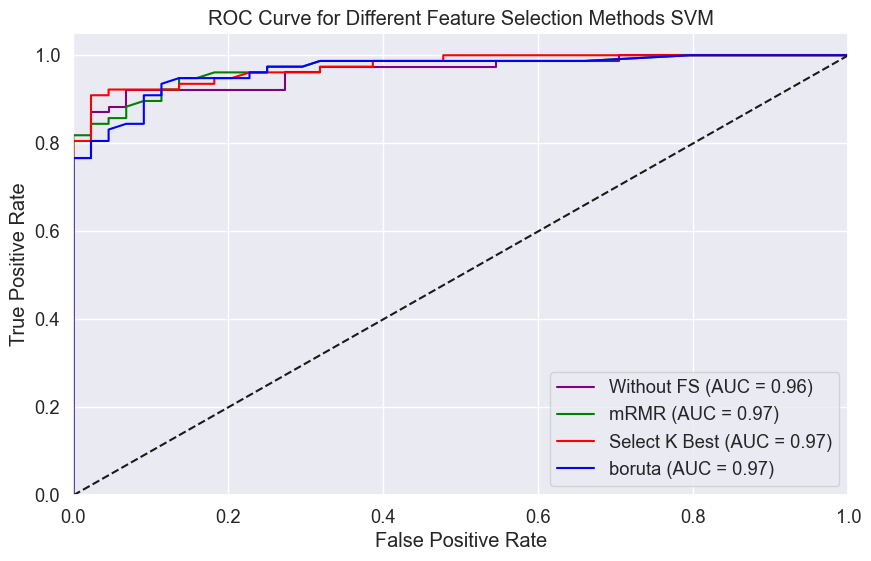

AUC for Without FS: 0.96340
AUC for mRMR: 0.97063
AUC for Select K Best: 0.97476
AUC for boruta: 0.96709


In [76]:
showROCAUC(allFS,[feature_selection.Voting.model for feature_selection in allFS],  'ROC Curve for Different Feature Selection Methods SVM')

### Comparing the models
We finished  demonstrating all the models and now it time to compare the models and to see the results!!<br>
We already compared and discussed about each algorithm. We saw the cross validation results and the test results.

Now we want to copmare the algorithms in each feature selection.
We want to see which model gets the best result on the test set based on the feature selection.




In [77]:

compare_data = []
for feature_selection in allFS:
    for algorithm in feature_selection.getalgorithms():
        metrics_dict = algorithm.test(feature_selection.newX_test, y_test)
        acc =  metrics_dict["accuracy"]
        f1 =  metrics_dict["f1_score"]
        recall =  metrics_dict["recall"]
        precision =  metrics_dict["precision"]

        compare_data.append({"Classifier Name":algorithm.name
                            , "Feature Selection Technique": feature_selection.name,
                            "Accuracy" : acc,
                            "f1 score": f1,
                            "recall" :recall,
                            "Preciosin": precision})


result_df = pd.DataFrame(compare_data)
result_df.set_index(['Feature Selection Technique', "Classifier Name"])

Accuracy  f1 score    recall  \
Feature Selection Technique Classifier Name                                     
Without FS                  Logistic regression  0.917355  0.933333  0.909091   
                            Descion Tree         0.760331  0.805369  0.779221   
                            Random Forest        0.884298  0.906667  0.883117   
                            AdaBoost             0.900826  0.923077  0.935065   
                            KNN                  0.727273  0.744186  0.623377   
                            SVM                  0.867769  0.896104  0.896104   
                            Voting               0.917355  0.934211  0.922078   
mRMR                        Logistic regression  0.892562  0.911565  0.870130   
                            Descion Tree         0.809917  0.834532  0.753247   
                            Random Forest        0.900826  0.915493  0.844156   
                            AdaBoost             0.892562  0.911565  0.870130   
                            KNN                  0.818182  0.849315  0.805195   
                            SVM                  0.892562  0.913907  0.896104   
                            Voting               0.900826  0.920000  0.896104   
Select K Best               Logistic regression  0.925620  0.938776  0.896104   
                            Descion Tree         0.752066  0.782609  0.701299   
                            Random Forest        0.884298  0.902778  0.844156   
                            AdaBoost             0.892562  0.911565  0.870130   
                            KNN                  0.851240  0.875000  0.818182   
                            SVM                  0.900826  0.921053  0.909091   
                            Voting               0.909091  0.924138  0.870130   
boruta                      Logistic regression  0.884298  0.904110  0.857143   
                            Descion Tree         0.834711  0.861111  0.805195   
                            Random Forest        0.867769  0.887324  0.818182   
                            AdaBoost             0.884298  0.905405  0.870130   
                            KNN                  0.876033  0.896552  0.844156   
                            SVM                  0.900826  0.921053  0.909091   
                            Voting               0.900826  0.920000  0.896104   

                                                 Preciosin  
Feature Selection Technique Classifier Name                 
Without FS                  Logistic regression   0.958904  
                            Descion Tree          0.833333  
                            Random Forest         0.931507  
                            AdaBoost              0.911392  
                            KNN                   0.923077  
                            SVM                   0.896104  
                            Voting                0.946667  
mRMR                        Logistic regression   0.957143  
                            Descion Tree          0.935484  
                            Random Forest         1.000000  
                            AdaBoost              0.957143  
                            KNN                   0.898551  
                            SVM                   0.932432  
                            Voting                0.945205  
Select K Best               Logistic regression   0.985714  
                            Descion Tree          0.885246  
                            Random Forest         0.970149  
                            AdaBoost              0.957143  
                            KNN                   0.940299  
                            SVM                   0.933333  
                            Voting                0.985294  
boruta                      Logistic regression   0.956522  
                            Descion Tree          0.925373  
                            Random Forest         0.969231  
                            AdaB

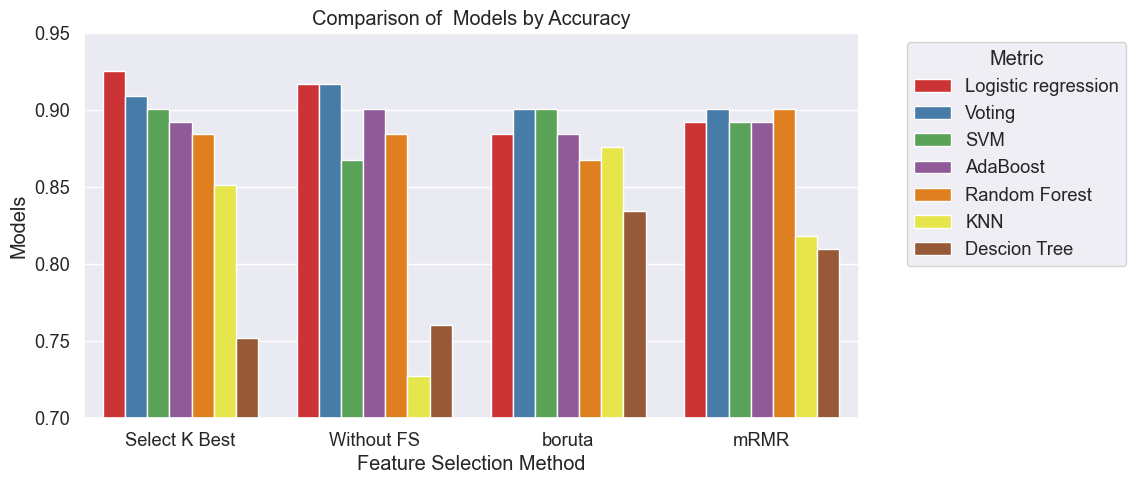

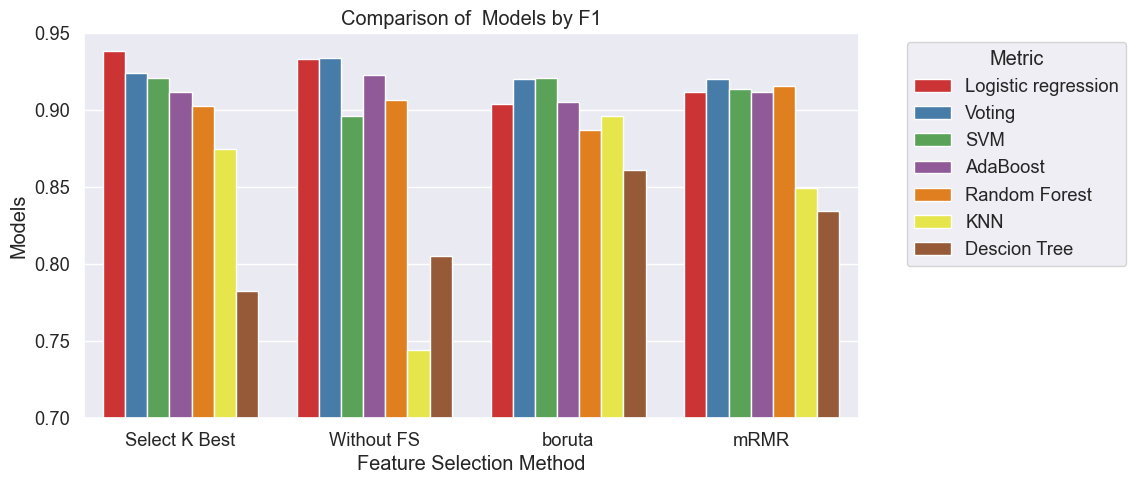

In [78]:
def sort_data(group, column_name):
    return group.sort_values(by=column_name,  ascending=False)

# Sort the data by 'Accuracy'
sorted_by_acc = result_df.groupby('Feature Selection Technique').apply(sort_data, column_name='Accuracy')

# Sort the data by 'f1 score'
sorted_by_f1 = result_df.groupby('Feature Selection Technique').apply(sort_data, column_name='f1 score')




plt.figure(figsize=(10, 5))
sns.barplot(x='Feature Selection Technique', y='Accuracy', hue='Classifier Name', data=sorted_by_acc, capsize=0.8, dodge=True, palette='Set1')

plt.title(f'Comparison of  Models by Accuracy')
plt.xlabel('Feature Selection Method')
plt.ylabel('Models')
plt.ylim(0.7, 0.95)  # Customize the y-axis limits
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Feature Selection Technique', y='f1 score', hue='Classifier Name', data=sorted_by_f1, capsize=0.8, dodge=True, palette='Set1')

# Customize the plot as needed
plt.title(f'Comparison of  Models by F1')
plt.xlabel('Feature Selection Method')
plt.ylabel('Models')
plt.ylim(0.7, 0.95)  # Customize the y-axis limits
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## Summarize

Let's summarize the results we obtained so far. We will identify the peak accuracy for each classifier, determine the highest accuracy achieved for each feature selection technique, and assess the overall impact of feature selection.
#### Classifier Performance:

<b> Logistic Regression:</b> Logistic Regression achieved a high accuracy of 91.74% without any feature selection.<br>
<b>Decision Tree:</b> The Decision Tree classifier showed an accuracy of 76.03% without feature selection, indicating moderate performance.<br>
<b>Random Forest:</b> Random Forest performed well with an accuracy of 88.43% without feature selection.<br>
<b>AdaBoost:</b> AdaBoost demonstrated a strong performance with an accuracy of 90.08% without feature selection.<br>
<b>KNN:</b> KNN had a relatively lower accuracy of 72.73% without feature selection.<br>
<b>SVM:</b> The SVM classifier achieved an accuracy of 86.78% without feature selection.<br>
<b>Voting:</b> The Voting classifier achieved accuracy of 91.74% without feature selection.
    
<b>Impact of Feature Selection Techniques:</b><br>
Feature selection techniques had a substantial positive impact on classifier performance across the board, leading to significant accuracy improvements.

<b>SelectKBest Feature Selection Technique:</b><br>
<b> Logistic Regression </b> exhibited the highest accuracy of 92.56% when the SelectKBest feature selection technique was applied, indicating its effectiveness in identifying relevant features.
This is the best accuracy between all models.<br>
Other classifiers, including <b>Decision Tree, Random Forest, AdaBoost, KNN, SVM, and Voting,</b> also demonstrated improved accuracy with SelectKBest.
    
<b>mRMR Feature Selection Technique: </b>
<b>KNN</b> experienced notable accuracy improvement, achieving 81.81% accuracy when mRMR feature selection was used.<br>
<b>AdaBoost, Decision Tree, Random Forest, SVM, and Voting </b> also showed accuracy improvements with mRMR.

<b>Boruta Feature Selection Technique:</b>
<b>Voting</b> displayed the highest accuracy of 90.1% and f1 score of 0.945 when the Boruta feature selection technique was applied.
Other classifiers also demonstrated improved performance with Boruta.

<b> Conclusion: </b>

Feature selection significantly enhanced classifier performance, with each technique offering unique advantages to different classifiers. <br>
<b>Logistic Regression and Voting</b> consistently demonstrated strong performance across various feature selection techniques, making it a robust choice.

To finish this section we will compare the time of training and the auc of each model based on feature selection.

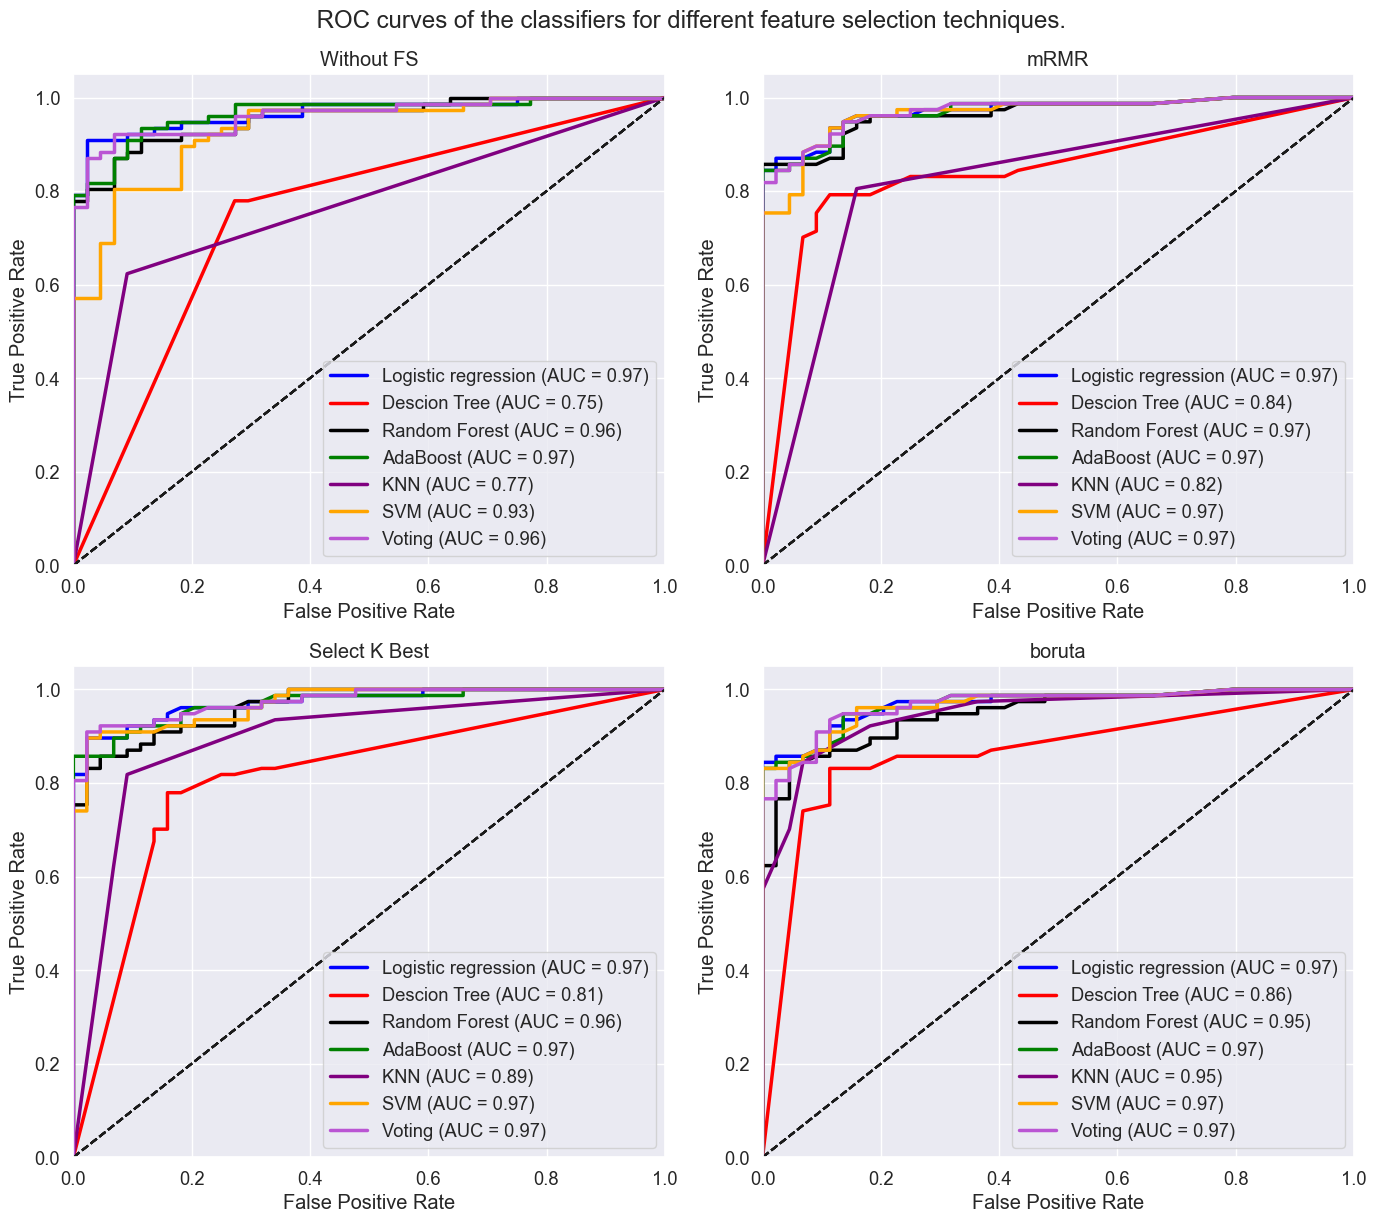

In [79]:
Roc_colors = ['blue','red','black','green','purple','orange','mediumorchid']
fig, axs = plt.subplots(len(allFS)//2, len(allFS)//2, figsize=(14, 12.5))
fig.suptitle(' ROC curves of the classifiers for different feature selection techniques.')

for i, feature_selection in enumerate(allFS):
    roc_curves = []
    auc_values = []
    for indexColor,a in enumerate(feature_selection.getalgorithms()):  # Iterate over the algorithms
        y_scores = a.model.predict_proba(feature_selection.newX_test)[:, 1]  # Get predicted probabilities for the positive class
        fpr, tpr, _ = roc_curve(y_test, y_scores)  # Calculate ROC curve
        roc_auc = auc(fpr, tpr)  # Calculate AUC
        roc_curves.append((fpr, tpr, roc_auc))
        auc_values.append(roc_auc)

        axs[i//2, i%2].plot(fpr, tpr, label=f'{a.name} (AUC = {roc_auc:.2f})', color=Roc_colors[indexColor], lw =2.5)
        axs[i//2, i%2].plot([0, 1], [0, 1], 'k--', lw =1.5)  # Diagonal line for reference

        axs[i//2, i%2].set_title(f'{feature_selection.name}')
        axs[i//2, i%2].set_xlim([0.0, 1.0])
        axs[i//2, i%2].set_ylim([0.0, 1.05])
        axs[i//2, i%2].set_xlabel('False Positive Rate')
        axs[i//2, i%2].set_ylabel('True Positive Rate')
        axs[i//2, i%2].legend(loc="lower right")
plt.tight_layout()
plt.show()


Time with Without FS
LR: 0.012127876 DT: 0.014875412 RF: 0.20143962 AdaB: 0.049923897 KNN: 0. SVM: 0.083117485 Voting: 0.23350668 

Time with mRMR
LR: 0. DT: 0.016641855 RF: 0.1330688 AdaB: 0.01718998 KNN: 0. SVM: 0.058293819 Voting: 0.060536146 

Time with Select K Best
LR: 0. DT: 0.016676426 RF: 0.19901514 AdaB: 0.048909664 KNN: 0.0023443699 SVM: 0.083141565 Voting: 0.11670709 

Time with boruta
LR: 0.016614199 DT: 0. RF: 0.071179628 AdaB: 0.028724909 KNN: 0. SVM: 0.094903946 Voting: 0.088433743 



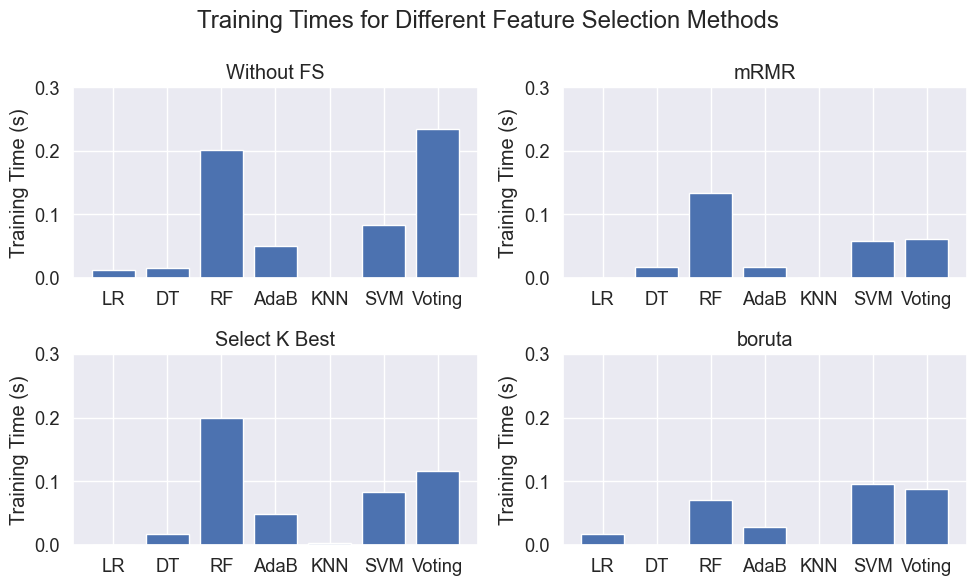

In [80]:
# For good view on the plot
long_to_short = {"AdaBoost": "AdaB", 'Logistic regression': 'LR','Descion Tree':'DT', 'Random Forest': 'RF' }


fig, axs = plt.subplots(len(allFS)//2, len(allFS)//2, figsize=(10, 6))
fig.suptitle('Training Times for Different Feature Selection Methods')
for i, feature_selection in enumerate(allFS):
    training_time = []
    algoNames = []
    for algo in feature_selection.getalgorithms():
        curr_train_time = algo.train(feature_selection.newX_train, y_resampled,Time = True)  # Train the algorithm and get the training time
        training_time.append(curr_train_time)
        if algo.name in long_to_short.keys():
            algoNames.append(long_to_short.get(algo.name))
        else:
            algoNames.append(algo.name)
    axs[i//2, i%2].bar(algoNames, training_time, color='b')
    axs[i//2, i%2].set_title(f'{feature_selection.name}')
    axs[i//2, i%2].set_ylabel('Training Time (s)')
    axs[i//2, i%2].set_ylim([0.0, 0.3])
    print(f'Time with {feature_selection.name}')
    for name, t in zip(algoNames,training_time):
        print(f'{name}: {t:.8}'.rstrip('0'), end=" ") #round to 8 digits after point and remove trailing zeros
    print('\n')


# Adjust spacing between subplots
plt.tight_layout()
plt.show()


Reducing the number of features using different feature selection techniques have made the classifiers faster. <br>
It is revealed that different feature selection techniques have reduced the training time of the classifiers significantly.

It is not suprise that the <b>Voting</b> is the slowest based on the fact that it has to run a several of algorithms.
<b>Random Forest </b> is also not fast because it also need to run several of <b>Decision Trees</b>.

We can see that some models did the train in zero time. Of course it is not realy zero seconds, but is really fast. KNN did it in all feature selection techniques, it is reasonable because its training process is very simple.

## Conclusion

We finished the first and major part of our project and now it's time to conclude the results we got, before we continue to the next part.

To ascertain the presence of depression, we used seven different machine learning classifiers.
By observing the outcomes of various models it can be confirmed that the Logistic Regression classifier with the SelectKBest feature selection technique is almost the perfect model to predict depression among the participants. 
It achieved an impressive accuracy of 92.56% and an f1 score of 0.985714. Additionally, the classifier exhibited noteworthy speed, and the AUC, measuring at 0.97329, further underscores its performance quality.

<b> To sum up </b><br>
We examined various models, and it appears that <b>Logistic Regression with SelectKBest</b> yielded the most favorable results on the test set. It's important to note that this doesn't necessarily declare it as the overall best model, rather, it indicates superior performance specifically on this test set. To determine the best model more comprehensively, we employed cross-validation which also got excellent results with this model.

Let's finish with visualization of its confusion matrix and the metric values.


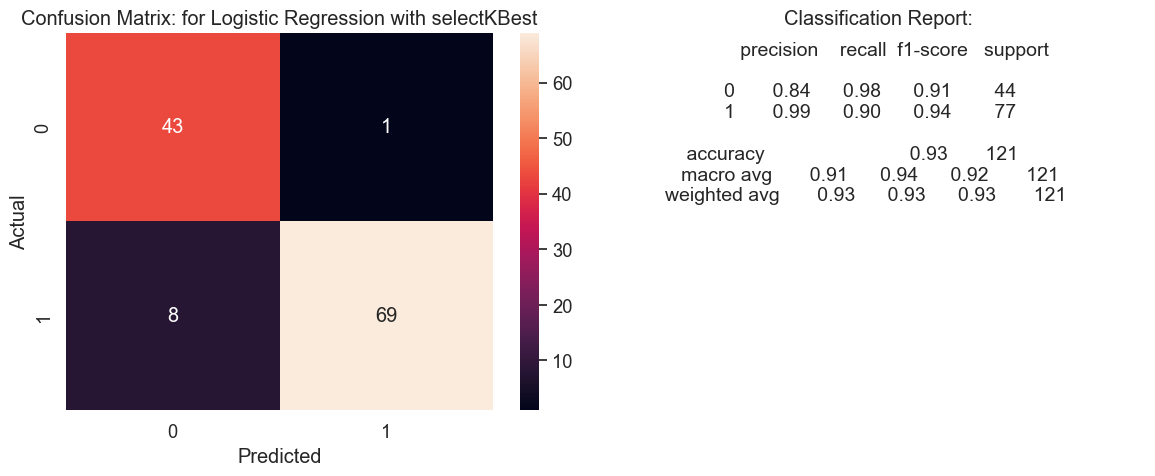

In [81]:
y_pred_best = selectKBest.LR.model.predict(selectKBest.newX_test)
conf_matrix = confusion_matrix(y_test,y_pred_best )
# Create a heatmap of the confusion matrixt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix: for Logistic Regression with selectKBest')

# Create a classification report
plt.subplot(1, 2, 2)
class_report = classification_report(y_test, y_pred_best)
plt.text(0.1, 0.5, class_report, fontsize=14,)
plt.axis('off')
plt.title(f'Classification Report:')

plt.tight_layout()
plt.show()



### Limitations
Though we got really nice results, we can always ask why not even better.<br>
Let's describe the limitations of our project and models. Most of the limitations occur because of our dataset, but this would occur on any dataset of depression participants.

The main limitations:

* We considered BDC as the ground truth to diagnose depression, which is indeed a limitation.
* No biological marker was included in the dataset for predicting depression. Different biological factors play a significant role in predicting depression in an individual. By including these biological factors, the model could predict depression more efficiently.
* The data set contains only specific features. It could provide more insights if we had additional information, such as details on social activities.
* Depression and mental health are not clear enough, and participants with exactly the same features will not necessarily have the same outcome. In our dataset, we have instances where two participants share exactly the same features, yet one is depressed while the other is not.<br> The two participants labeled as No.40 and No.329. Despite having identical features, their outcomes differ—one is depressed, and the other is not. This highlights the difficulty of achieving 100% accuracy in predicting depression.

To demonstrate the last limitation let's examine the two participants (N0.40 and N0.329)

In [82]:
predict_features = df.columns[:30]
target_feature = 'DEPRESSED'

# Find rows where the first 30 columns are duplicated but the last column is different
unique_duplicates = df[df.duplicated(subset=predict_features, keep=False) & ~df.duplicated(keep=False)]
# Group the rows by the first 30 columns to find duplicates
grouped_duplicates = unique_duplicates.groupby(list(predict_features))

#show all predict featuers to show that they are the same except the Depressed

pd.set_option('display.max_columns', None)
print(grouped_duplicates.head())
#rest the setting
pd.reset_option('max_columns')


    AGERNG GENDER       EDU     PROF     MARSTS RESDPL       LIVWTH ENVSAT  \
40   21-25   Male  Graduate  Student  Unmarried   Town  With Family    Yes   
329  21-25   Male  Graduate  Student  Unmarried   Town  With Family    Yes   

    POSSAT FINSTR DEBT      PHYEX SMOKE DRINK ILLNESS PREMED EATDIS   AVGSLP  \
40      No    Yes   No  Sometimes    No    No      No     No     No  5 hours   
329     No    Yes   No  Sometimes    No    No      No     No     No  5 hours   

    INSOM               TSSN    WRKPRE ANXI DEPRI ABUSED CHEAT THREAT SUICIDE  \
40    Yes  Less than 2 hours  Moderate   No    No     No    No     No      No   
329   Yes  Less than 2 hours  Moderate   No    No     No    No     No      No   

    INFER CONFLICT LOST  DEPRESSED  
40     No       No   No          1  
329    No       No   No          0  


If we  focus on the specific feature selection methods we employed, it's likely that we'll discover more instances of duplicated data where the outcome for depression differs.



## Feature importance
We have completed the first part of the project and it's time to move on to the second part.<br>
As we mentioned in the beginning, one of the goals of the project is to find out which features have the greatest impact on depression.<br>
Exploring Feature importance will help us also to understand the behaviors of our models.

It is worth mentioning that the most important feature might be (and might not be) different from the feature we selected in the feature selection techniques. However it will not be surprising if most of them will have features in common.<br>
For example, in the mRMR the main goal of the technique is to <b>Minimum Redundancy</b> (it is even in its name!!)

Luckily for us, some of the models we used use statistical methods to calculate the Feature importance. So we will use those models for our task.

<b>How will we do that?</b><br>
We will use the models that we have already built that provide us a way to find out the feature importance.<br>
The models are:<br>
<b>Logistic Regression, Decision Trees, Random Forest and AdaBoost (which uses Decision Trees).</b><br>
We will rank the features based on their importance scores for each model and feature selection method. In the end calculate an average of all the rankings to consolidate feature importance scores. In the end we will visualize the results.

Before we get down to the task we will give a short explanation about how the <b>Decision Trees and Logistic Regression</b> algorithms determine which features are the most important.

<b>Decision Trees:</b><br>
Decision Trees make decisions by asking a series of questions about the features of the data. They start with the feature that, when split, creates the purest subsets, meaning it separates the data into the most distinct groups based on the target variable. This feature becomes the root of the tree.

As the tree grows, it continues to select features that result in the most significant reduction in uncertainty or impurity. Features that are closer to the root of the tree and appear in multiple decision paths are typically considered more important because they have a greater impact on the final decision.

<b>Logistic Regression:</b><br>
Logistic Regression measures the relationship between each feature and the target variable by calculating coefficients.<br>
These coefficients represent the direction (positive or negative) and strength of the relationship between a feature and the likelihood of the target variable.

In simpler terms, Logistic Regression assigns a weight to each feature. Features with larger weights have a more substantial impact on the prediction.
Positive weights mean that as the feature increases, the probability of the target variable also increases, while negative weights indicate the opposite. For us we just want to know if the feature is important so we will relate all values in absolute values.

In both methods, the importance of features is determined by how much they contribute to making accurate predictions.
Features that strongly influence the model's decisions are considered more important.



In [83]:
# Initialize empty lists to accumulate feature importance scores
importance = np.zeros(len(withoutFS.getSelectedFeatureIindices()))
divideBy = np.zeros(len(withoutFS.getSelectedFeatureIindices()))
# Loop through all feature selection methods
for Fs in allFS:
    currImportance = np.zeros(len(Fs.getSelectedFeatureIindices()))
    # Logistic Regression
    currImportance += list(np.abs(Fs.LR.model.coef_[0]))

    # Decision Tree
    currImportance += list(Fs.DT.model.feature_importances_)

    # Random Forest
    currImportance += list(Fs.RF.model.feature_importances_)

    # AdaBoost
    currImportance += list(Fs.AdaBoost.model.feature_importances_)
    importance[Fs.getSelectedFeatureIindices()]+= currImportance
    # addaing to divideBy what inidices we used, so we can calculate aggreatation.
    divideBy[Fs.getSelectedFeatureIindices()] += 4

# Aggregate feature importance scores
aggregated_importance = importance/divideBy

feature_ranking = np.argsort(aggregated_importance)[::-1]

In [84]:
# Print the ranking of features
# To see clearly the proportions we multiply by 100 the scores
print("\tScore avarge and aggreation sort by ranking multiply by 100\n")
for rank, feature_idx in enumerate(feature_ranking):
    print(f"Rank {rank + 1:2}: Feature Name: {df.columns[feature_idx].ljust(10)} Importance Score: {aggregated_importance[feature_idx]*100:.6f}")

	Score avarge and aggreation sort by ranking multiply by 100

Rank  1: Feature Name: DEPRI      Importance Score: 62.210163
Rank  2: Feature Name: ANXI       Importance Score: 56.983891
Rank  3: Feature Name: INFER      Importance Score: 51.833044
Rank  4: Feature Name: ABUSED     Importance Score: 50.923840
Rank  5: Feature Name: CHEAT      Importance Score: 45.638799
Rank  6: Feature Name: CONFLICT   Importance Score: 45.534982
Rank  7: Feature Name: ENVSAT     Importance Score: 44.202120
Rank  8: Feature Name: THREAT     Importance Score: 44.034811
Rank  9: Feature Name: LOST       Importance Score: 42.442219
Rank 10: Feature Name: POSSAT     Importance Score: 41.161357
Rank 11: Feature Name: INSOM      Importance Score: 33.703850
Rank 12: Feature Name: FINSTR     Importance Score: 30.177992
Rank 13: Feature Name: SUICIDE    Importance Score: 30.174457
Rank 14: Feature Name: DEBT       Importance Score: 15.487867
Rank 15: Feature Name: PHYEX      Importance Score: 13.182123
Rank 16:

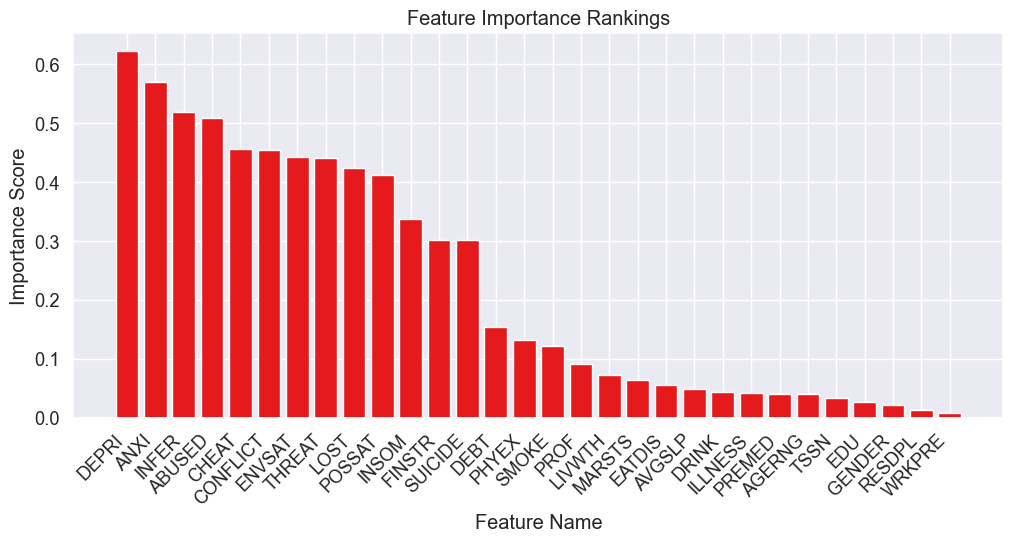

In [85]:
# Create a figure and axis for the plot
plt.figure(figsize=(12, 5))
ax = plt.gca()

# Plot the importance scores
ax.bar(range(X_train.shape[1]), aggregated_importance[feature_ranking])
plt.xticks(range(X_train.shape[1]), [df.columns[i] for i in feature_ranking], rotation=45, ha='right')

ax.set_xlabel('Feature Name')
ax.set_ylabel('Importance Score')
plt.title('Feature Importance Rankings')

plt.show()


From this plot, we can come to some interesting conclusions:

The most influential feature in predicting depression is <b>"DEPRI"</b> with an importance score of 0.6221. This suggests that this feature plays a significant role in identifying individuals with depression.<br>
<b>"ANXI"</b> is the second most important feature with an importance score of 0.5698. It indicates that anxiety-related factors are also highly correlated with depression.<br>
<b>"INFER"</b> and <b>"ABUSED"</b> are ranked third and fourth in importance, indicating that feelings of inferiority and experiences of abuse are strong predictors of depression.<br>
<b>"CHEAT"</b> and <b>"CONFLICT"</b> have similar importance scores, emphasizing the significance of trust issues and interpersonal conflicts in depression prediction.<br>
<b>"ENVSAT"</b> and <b>"THREAT"</b> follow closely, suggesting that environmental satisfaction and perceived threats contribute to depression risk.<br>
<b>"LOST"</b> and <b>"POSSAT"</b> are ranked ninth and tenth, indicating that loss experiences and overall life satisfaction are also relevant features.<br>
A noteworthy observation is the substantial drop in importance scores from <b>"SUICIDE"</b> to <b>"DEBT"</b> and beyond. This transition suggests a shift from highly impactful features to those with lesser influence.<br>
Features like <b>"GENDER" ,"RESDPL"</b> and <b>"WRKPRE"</b> have the lowest importance scores, suggesting they have minimal impact on predicting depression.

These findings highlight the key factors that influence depression and emphasize the complex interplay of various socio-demographic and psychosocial elements in understanding and predicting depressive tendencies.

Feature importance rankings should be considered within the context of the dataset and the population under study. For instance, in our dataset, <b>"AGERNG"</b> does not exhibit a high importance score. This might be due to the fact that the majority of participants fall within a similar age range. Consequently, in our specific dataset, age does not appear to significantly influence depression. However, it's worth noting that in a different dataset, the impact of age on depression could vary.

#### Shap Values

Another way to understand the importance of features and the behavior's of models, is using the shap library. We will examine with this library only the best model we got:<b> Logistic Regression with Select K Best</b> feature selection.<br>
We assume that the best model can also help us to find the most important features.

The shap values tell us how the features' values affect the model behavior.

In [86]:
shap.initjs() ## Load JS visualization code to notebook


bestModel = selectKBest.LR.model

explainer = shap.Explainer(
  bestModel  , selectKBest.newX_train
)
shap_values = explainer(selectKBest.newX_test)


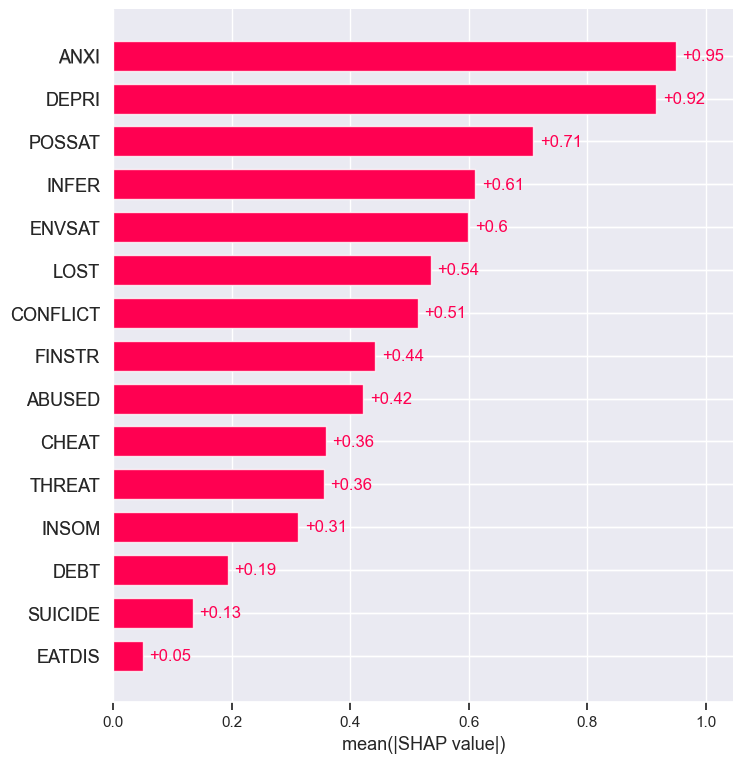

In [87]:
shap.plots.bar(shap_values, max_display= len(selectKBest.getSelectedFeatuersNames()))


Both <b>DEPRI</b> and <b>ANXI</b> consistently appear as top important features in our feature importance analysis. This alignment serves as strong validation for the importance of these factors in our predictive model and on Depression in general.

In the following plot, we gain valuable insights into how the model makes specific decisions. At its core, the plot illustrates two key values:

* <b>f(x):</b> This represents the model's output for a particular sample.
* <b>E[f(x)]:</b> This is the expected model output when applied to the entire test dataset.

The plot provides a detailed breakdown of how each feature influences the model's prediction, shifting it from the base value (an average prediction across the training data) to the actual model output.

The features which push the prediction higher are highlighted in red, while those driving the prediction lower are displayed in blue.<br>
This visual representation allows us to understand for which values ​​the features will affect whether the person is depressed or not.


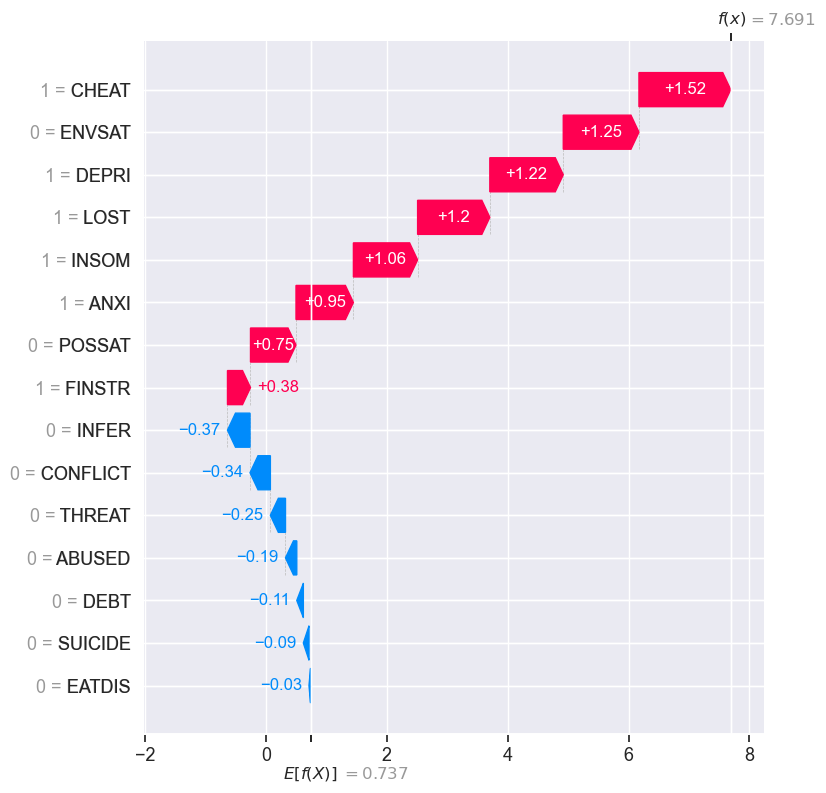

In [88]:
example_index = 4
shap.plots.waterfall(shap_values[example_index], max_display= len(selectKBest.getSelectedFeatuersNames()))


An interesting insight from the plot is that when a feature is marked as 'yes,' it tends to have a more significant impact on the model's decision than when it's marked 'no.' <br>
This suggests that if an individual has a feature like 'ANXI,' for instance, there's a good possibility that they might be experiencing depression.
However, when the feature is 'no,' we cannot be as certain about their depression status

## Summary

In this project, we aimed to develop a predictive model for depression based on socio-demographic features and mental health indicators. We highlighted the importance of understanding depression and its societal impact.

To comprehend the dataset's structure and unveil potential patterns, we conducted thorough exploratory data analysis. Noteworthy insights emerged, revealing correlations between specific mental health indicators and depression.

Facing a problem with too many depressed participants in our data, we used oversampling technique to balance it out. This made sure our model was trained on a fair and even dataset.

Various feature selection techniques, including Boruta, mRMR (minimum Redundancy Maximum Relevance), and SelectKBest, were employed. Features were chosen based on their importance in predicting depression, considering both socio-demographic and mental health factors.

Our approach involved training multiple machine learning models such as Logistic Regression, Random Forest, AdaBoosting, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), and an ensemble Voting model. Hyperparameter tuning was conducted using k-fold cross-validation to optimize model performance.

We comapered accuracy results with k-fold cross-validation. Evaluation metrics, including accuracy, precision, recall, F1-score, and AUC, were employed on the test set.

Our conclusion was that, Logistic Regression with SelectKBest feature selection demonstrated the highest performance on the test set. 

Feature importance was examined, revealing <b>anxiety</b> and a sense of <b>deprivation</b> as variables with the most significant impact on depression predictions

To conclude I belive my project and these findings contribute valuable insights into the nuanced relationship between socio-demographic and mental health factors in predicting depression.